<a href="https://colab.research.google.com/github/cjm112a/forestfire/blob/dev/Forestfire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimization based on minimizing total travel distance from all pickers.

0: [(70, 20), (22, 80), (28, 60), (29, 30), (20, 90)]
1: [(70, 40), (58, 0)]
2: [(85, 0), (57, 40), (67, 50), (71, 20)]
3: [(63, 80), (59, 50), (48, 0), (87, 20), (56, 10)]
4: [(87, 20), (96, 90), (21, 10), (33, 0)]
5: [(23, 90), (58, 0)]
6: [(43, 70), (79, 70), (80, 40), (39, 50), (70, 40)]
7: [(33, 20), (54, 10), (65, 50), (33, 0), (59, 0)]
8: [(89, 0)]
9: [(33, 60)]
10: [(80, 40), (50, 40)]
11: [(31, 70), (75, 50), (75, 50)]
12: [(70, 40), (59, 0), (21, 10)]
13: [(77, 60), (91, 80), (96, 70), (46, 70)]
14: [(56, 10), (54, 40)]
15: [(82, 70), (20, 90), (85, 40), (79, 70), (63, 30)]
16: [(59, 0)]
17: [(96, 90), (82, 70), (91, 80), (23, 30), (57, 90)]
18: [(56, 10), (80, 40)]
19: [(89, 0), (97, 80)]
20: [(23, 90), (51, 50), (82, 10), (96, 90)]
21: [(23, 30), (33, 20), (56, 10), (100, 50)]
22: [(67, 40), (43, 70), (20, 90), (33, 20), (43, 70)]
23: [(55, 20), (85, 60), (22, 80), (71, 10), (69, 90)]
24: [(43, 70), (85, 40), (69, 20), (95, 60), (20, 90)]
25: [(80, 40)]
26: [(40, 30), (54, 

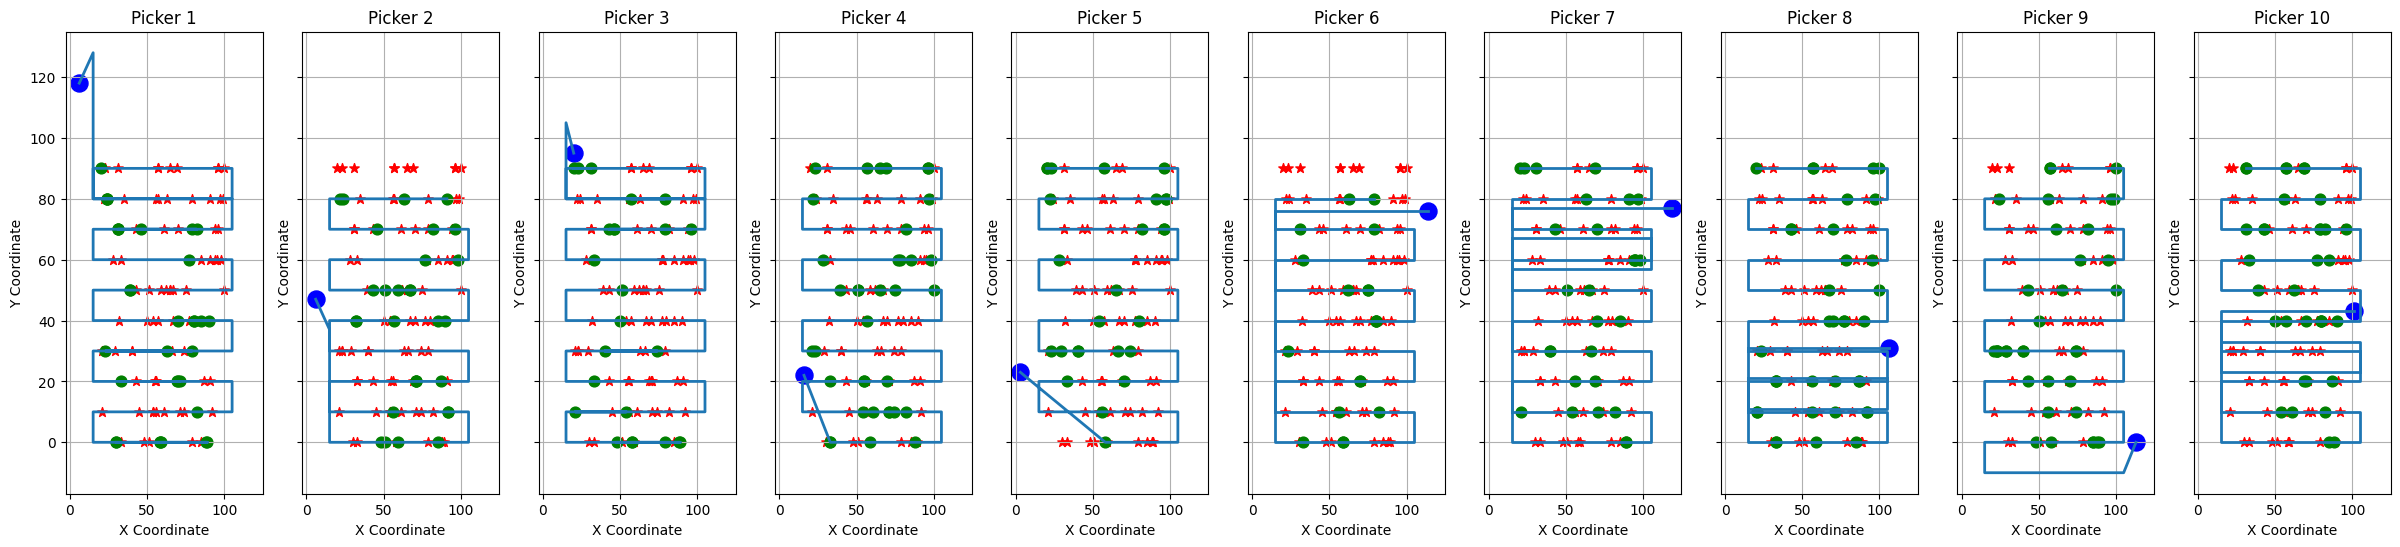

In [ ]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

rows = 100
cols = 100
num_items = 100
num_pickers = 10
MaxIt = 500
nPop = 50 #number of population
pc = 0.90;  #probability of crossover
pm = 0.04 ; #probability of mutation
nc = 2*round((nPop*pc)/2);  #No. of crossover
nm = round(nPop*pm)
beta=0.1
TournmentSize = 5

start_row = 0
step_between_rows = 10
number_of_lines = 10
selected_rows = [start_row + i * step_between_rows for i in range(number_of_lines)]

#random.seed(42)
picker_locations = [(6, 118), (6, 47), (20, 95), (16, 22), (3, 23), (114, 76), (119, 77), (106, 31), (113, 0), (101, 43)]
item_locations=[(89, 0), (59, 0), (85, 0), (79, 0), (30, 0), (33, 0), (88, 0), (58, 0), (51, 0), (48, 0), (54, 10), (56, 10), (54, 10), (45, 10), (21, 10), (82, 10), (71, 10), (92, 10), (74, 10), (61, 10), (55, 20), (69, 20), (87, 20), (71, 20), (43, 20), (33, 20), (56, 20), (70, 20), (91, 20), (33, 20), (79, 30), (40, 30), (40, 30), (74, 30), (21, 30), (66, 30), (23, 30), (63, 30), (23, 30), (29, 30), (80, 40), (67, 40), (77, 40), (50, 40), (57, 40), (54, 40), (90, 40), (85, 40), (32, 40), (70, 40), (75, 50), (62, 50), (65, 50), (59, 50), (65, 50), (100, 50), (51, 50), (43, 50), (67, 50), (39, 50), (95, 60), (98, 60), (85, 60), (94, 60), (78, 60), (33, 60), (77, 60), (77, 60), (91, 60), (28, 60), (43, 70), (31, 70), (46, 70), (94, 70), (82, 70), (31, 70), (79, 70), (61, 70), (96, 70), (70, 70), (35, 80), (63, 80), (56, 80), (22, 80), (79, 80), (24, 80), (97, 80), (57, 80), (99, 80), (91, 80), (69, 90), (23, 90), (96, 90), (20, 90), (57, 90), (100, 90), (96, 90), (65, 90), (57, 90), (31, 90)]
picker_capacities = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

num_orders = 100

orders = {}

for i in range(0, num_orders):

    num_items_in_order = random.randint(1, 5)

    selected_items = random.choices(item_locations, k=num_items_in_order)

    orders[i] = selected_items

for order, items in orders.items():
    print(f"{order}: {items}")
# picker_locations = []
# for i in range(num_pickers//2):
#     picker_locations.append((random.randint(0,20),random.randint(0,120)))
# for i in range(num_pickers//2):
#     picker_locations.append((random.randint(100,120),random.randint(0,120)))
#item_locations = [(65, 41), (42, 66), (74, 18), (44, 54), (31, 92), (89, 11), (64, 62), (41, 38), (24, 13), (32, 59), (49, 69), (34, 38), (67, 31), (41, 82), (83, 1), (79, 90), (30, 10), (33, 100), (96, 12), (58, 71), (41, 86), (21, 29), (42, 86), (60, 14), (89, 38), (97, 63), (73, 37), (96, 14), (90, 34), (99, 15), (34, 39), (38, 70), (37, 50), (61, 45), (49, 18), (95, 1), (40, 10), (79, 97), (85, 42), (70, 39), (56, 46), (82, 18), (41, 39), (53, 33), (63, 53), (20, 23), (29, 74), (44, 52), (81, 84), (49, 53), (70, 23), (22, 26), (99, 63), (64, 80), (31, 40), (47, 78), (66, 7), (74, 33), (53, 96), (87, 72), (37, 50), (51, 67), (79, 77), (41, 96), (89, 39), (34, 76), (81, 7), (38, 26), (30, 43), (27, 9), (66, 87), (41, 2), (62, 50), (95, 70), (25, 24), (93, 1), (22, 88), (43, 61), (36, 24), (58, 43), (38, 40), (62, 83), (72, 60), (100, 48), (31, 73), (79, 21), (43, 81), (22, 28), (37, 36), (65, 69), (52, 51), (91, 26), (96, 64), (52, 50), (45, 47), (47, 48), (30, 46), (55, 32), (100, 47), (55, 67)]
#for i in range(num_items):
  #  item_locations.append((random.randint(20,cols),random.randint(0,rows)))
print(picker_locations)
picker_locations1 = picker_locations.copy()


# item_locations = []
# for row in selected_rows:
#     for i in range(10):
#         # Append random column positions (column_start to column_end) for the given row
#         item_locations.append((random.randint(20, 100), row))
print(item_locations)


def e_d(picker_location,item_location):
        x1, y1 = picker_location
        x2, y2 = item_location
        distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        return distance
#Tournament
def tournament_selection(population, TournmentSize):

    tournament_contestants = random.sample(population, TournmentSize)
    #print("tournament_contestants",population)
    winner = sorted(tournament_contestants, key=lambda x: x[1])[0]
    return winner[0]

#fitness with sorted paths
def calc_distance_with_shortest_route(picker_locations, item_locations, emptypop_position):

      left_walkway=15
      right_walkway=105

      assignments = [[] for _ in range(num_pickers)]
      for index, picker_index in enumerate(emptypop_position):
          assignments[picker_index].extend(orders[index])

      sorted_data = [[] for _ in range(num_pickers)]

      total_fitness_score=0

      # sorted_data = []

      for i in range(len(picker_locations)):
          data=assignments[i]
          quotients = {}
          for item in data:
              quotient = item[1] // 10
              if quotient not in quotients:
                  quotients[quotient] = []
              quotients[quotient].append(item)

          for quotient in sorted(quotients.keys()):
              group = quotients[quotient]
              if quotient % 2 != 0:  # Even
                  sorted_group = sorted(group, key=lambda x: x[0], reverse=True)
              else:  # Odd
                  sorted_group = sorted(group, key=lambda x: x[0])
              sorted_data[i].extend(sorted_group)

#both unfavourable entry
      for p in range(len(picker_locations)):
        if not sorted_data[p]:
          continue
        if picker_locations[p][0] < 50:
          if sorted_data[p][0][1] % 20 != 0 and sorted_data[p][-1][1] % 20 != 0:
                sorted_data[p].insert(0,picker_locations[p])
                # sorted_data[p].insert(1,(picker_locations[p][0],sorted_data[p][0][1]-step_between_rows))
                # sorted_data[p].insert(2,(right_walkway,sorted_data[p][0][1]-step_between_rows))
                # sorted_data[p].insert(3,(right_walkway,sorted_data[p][0][1]))
        else:
          if sorted_data[p][0][1]%20 == 0 and sorted_data[p][-1][1]%20 ==0:
            sorted_data[p].insert(0,picker_locations[p])


#one favourable entry
      for p in range(len(picker_locations)):
        if not sorted_data[p]:
          continue
        dist1=e_d(picker_locations[p],sorted_data[p][0])
        dist2=e_d(picker_locations[p],sorted_data[p][-1])

        if picker_locations[p][0] < 50:
          if dist1<dist2:
            if sorted_data[p][0][1]%20 == 0 and sorted_data[p][-1][1]%20 !=0:
              sorted_data[p].insert(0,picker_locations[p])
            else :
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(left_walkway,sorted_data[p][0][1]-step_between_rows))
          else:
            r_flag=1
            if sorted_data[p][0][1]%20 != 0 and sorted_data[p][-1][1]%20 ==0:
              sorted_data[p]=sorted_data[p][::-1]
              sorted_data[p].insert(0,picker_locations[p])
            else:
              sorted_data[p]=sorted_data[p][::-1]
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(left_walkway,sorted_data[p][0][1]+step_between_rows))
        else:
          if dist1<dist2:
            if sorted_data[p][0][1]%20 != 0 and sorted_data[p][-1][1]%20 ==0:
              sorted_data[p].insert(0,picker_locations[p])
            else:
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(right_walkway,sorted_data[p][0][1]-step_between_rows))
          else:
            if sorted_data[p][0][1]%20 == 0 and sorted_data[p][-1][1]%20 !=0:
              sorted_data[p]=sorted_data[p][::-1]
              sorted_data[p].insert(0,picker_locations[p])
            else:
              sorted_data[p]=sorted_data[p][::-1]
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(right_walkway,sorted_data[p][0][1]+step_between_rows))

#both favourable
      for p in range(len(picker_locations)):
        if not sorted_data[p]:
          continue
        if picker_locations[p][0] < 50:
          if sorted_data[p][0][1]%20 == 0 and sorted_data[p][-1][1]%20 ==0:
            sorted_data[p].insert(0,picker_locations[p])
        else:
          if sorted_data[p][0][1]%20 != 0 and sorted_data[p][-1][1]%20 !=0:
            sorted_data[p].insert(0,picker_locations[p])

      l=[]

      for k in sorted_data:
        if not k:
              l.append([])
              continue
        l1 = k.copy()
        # if k[1][1] % 20 != 0:
        #     l1.insert(1, (right_walkway, k[1][1]))
        # else:
        #     l1.insert(1, (left_walkway, k[1][1]))

        i = 1
        while i < len(l1) - 1:
            if l1[i][1] != l1[i + 1][1]:
                if l1[i][1] % 20 == 0:
                    if l1[i + 1][1] % 20 != 0:

                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, l1[i + 2][1]))
                        i += 2
                    else:
                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, (l1[i + 2][1] - step_between_rows)))
                        l1.insert(i + 3, (left_walkway, (l1[i + 3][1] - step_between_rows)))
                        l1.insert(i + 4, (left_walkway, l1[i + 4][1]))
                        i += 4
                else:
                    if l1[i + 1][1] % 20 == 0:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, l1[i + 2][1]))
                        i += 2
                    else:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, (l1[i + 2][1] - step_between_rows)))
                        l1.insert(i + 3, (right_walkway, (l1[i + 3][1] - step_between_rows)))
                        l1.insert(i + 4, (right_walkway, l1[i + 4][1]))
                        i += 4
            else:
                i += 1
        l.append(l1)
      total_cost = 0
      individual_costs = []
      for points in l:
          list_cost = 0

          for i in range(len(points) - 1):
              x1, y1 = points[i]
              x2, y2 = points[i + 1]
              distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
              list_cost += distance

          individual_costs.append(list_cost)
          total_cost += list_cost

      return total_cost,l,assignments


def crossover(x1, x2):

    q = random.uniform(0, 1)

    if q <= pc:

        g = random.randint(1, 2)

        if g == 1:
            y1, y2 = single_point_crossover(x1, x2)
        elif g == 2:
            y1, y2 = uniform_crossover(x1, x2)

        # Ensure offspring satisfy picker capacity constraints
        y1 = enforce_capacity_constraints(y1, picker_capacities)
        y2 = enforce_capacity_constraints(y2, picker_capacities)

    else:

        y1 = x1[:]
        y2 = x2[:]

    return y1, y2


def single_point_crossover(x1, x2):

    n = len(x1)

    crossover_point = random.randint(1, n - 1)

    y1 = x1[:crossover_point] + x2[crossover_point:]
    y2 = x2[:crossover_point] + x1[crossover_point:]

    return y1, y2


def uniform_crossover(x1, x2):

    n = len(x1)
    y1 = []
    y2 = []

    for i in range(n):
        if random.random() < 0.5:
            y1.append(x1[i])
            y2.append(x2[i])
        else:
            y1.append(x2[i])
            y2.append(x1[i])

    return y1, y2


def enforce_capacity_constraints(offspring, picker_capacities):

    # Count how many items are currently assigned to each picker
    assigned_counts = [0] * num_pickers
    for picker_id in offspring:
        assigned_counts[picker_id] += 1

    # Identify pickers that are over their capacity
    over_capacity = {picker_id: count - picker_capacities[picker_id]
                     for picker_id, count in enumerate(assigned_counts) if count > picker_capacities[picker_id]}

    # Reassign items from over-capacity pickers
    for i, picker_id in enumerate(offspring):
        if picker_id in over_capacity and over_capacity[picker_id] > 0:
            # Find a valid picker with available capacity
            valid_pickers = [p for p in range(num_pickers) if assigned_counts[p] < picker_capacities[p]]

            if valid_pickers:
                # Reassign the item to a valid picker
                new_picker = random.choice(valid_pickers)
                offspring[i] = new_picker

                # Update counts
                assigned_counts[picker_id] -= 1
                assigned_counts[new_picker] += 1
                over_capacity[picker_id] -= 1

    return offspring

def mutate_with_capacity(x, picker_capacities):
    y = x[:]
    attempts = 10

    while attempts > 0:  # Try mutating while respecting capacity
        j = np.random.randint(len(x))
        assigned_picker = y[j]
        new_picker = np.random.randint(num_pickers)

        y[j] = new_picker

        # Check capacity constraint
        assigned_counts = [y.count(picker_id) for picker_id in range(num_pickers)]
        if all(assigned_counts[picker_id] <= picker_capacities[picker_id] for picker_id in range(num_pickers)):
            return y  # Valid mutation found

        # Revert and try again
        y[j] = assigned_picker
        attempts -= 1

    return x

def main():
    empty_pop = []

    # Initial Population
    for iteration in range(nPop-1):
        emptypop_position = []

        assigned_counts = [0] * num_pickers

        for f in range(num_items):
            valid_pickers = [i for i in range(num_pickers) if assigned_counts[i] < picker_capacities[i]]
            if not valid_pickers:
                raise ValueError("Not enough picker capacity to assign all items.")

            picker_id = random.choice(valid_pickers)
            assigned_counts[picker_id] += 1
            emptypop_position.append(picker_id)

        random.shuffle(emptypop_position)


        # Use `calc_distance_with_shortest_route()` to calculate fitness and get sorted paths
        fitness_score, sorted_paths,_ = calc_distance_with_shortest_route(picker_locations, item_locations, emptypop_position)
        # b=[8, 3, 8, 8, 3, 3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 8, 7, 3, 3, 7, 7, 7, 3, 3, 3, 7, 7, 3, 9, 3, 3, 9, 3, 9, 3, 9, 3, 3, 9, 9, 9, 3, 3, 3, 9, 9, 3, 9, 9, 9, 9, 9, 9, 9, 1, 1, 9, 1, 9, 9, 9, 9, 9, 1, 9, 9, 9, 1, 2, 2, 2, 5, 5, 2, 9, 2, 5, 9, 2, 2, 2, 2, 5, 2, 5, 2, 5, 5, 2, 2, 5, 2, 2, 5, 5, 2, 2, 2]
        # empty_pop.append([b,2325.0822726980086])
        empty_pop.append([emptypop_position, fitness_score])  # Append individuals with their fitness

    pop = sorted(empty_pop, key=lambda x: x[1])  # Sort population by fitness
    best_solution = pop[0]

    # Genetic Algorithm Loop
    for iteration in range(MaxIt):
        crossover_population = []

        # Crossover
        for c in range(nc // 2):
            parent1 = tournament_selection(pop, TournmentSize)
            parent2 = tournament_selection(pop, TournmentSize)
            offspring1_position, offspring2_position = crossover(parent1, parent2)

            offspring1_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring1_position)
            offspring2_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring2_position)

            crossover_population.append([offspring1_position, offspring1_fitness])
            crossover_population.append([offspring2_position, offspring2_fitness])

        empty_pop.extend(crossover_population)

        # Mutation
        mutation_population = []
        for c in range(nm):
            parent = random.choice(pop)[0]
            offspring_position = mutate_with_capacity(parent, picker_capacities)

            offspring_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring_position)

            mutation_population.append([offspring_position, offspring_fitness])

        empty_pop.extend(mutation_population)

        # Select the next generation
        empty_pop = sorted(empty_pop, key=lambda x: x[1])
        pop = empty_pop[:nPop]  # Only take the top `nPop` individuals
        new_best_solution = pop[0]

        print(f"Iteration:{iteration} Best Solution:", new_best_solution[0],new_best_solution[1])

    final_solution = new_best_solution[0]

    # Final output
    print(f"\nFinal Best Solution (Pick Assignments): {final_solution}")

    # Generate orders for each picker based on the final solution
    orders = {picker_id: [] for picker_id in range(num_pickers)}
    for item_id, picker_id in enumerate(final_solution):
        orders[picker_id].append(item_id)

    print("\nOrders for Each Picker:")
    for picker_id, items in orders.items():
        print(f"Picker {picker_id}: Orders {items}")

    # Generate **sorted paths** for plotting
    _,sorted_paths,assignments = calc_distance_with_shortest_route(picker_locations, item_locations, final_solution)

    # Plot results with sorted paths
    fig, axes = plt.subplots(nrows=1, ncols=len(picker_locations1), figsize=(30, 6), sharex=True, sharey=True)

    picker_x, picker_y = zip(*picker_locations1)  # Original picker locations
    item_x, item_y = zip(*item_locations)  # All item locations

    for group, ax in enumerate(axes):
        if group >= len(picker_locations1):  # Prevent index errors
            continue

        ax.scatter(*picker_locations1[group], c='blue', s=150, label='Picker Start', marker='o')  # Start picker locations

        ax.scatter(item_x, item_y, c='red', s=50, label='Items', marker='*')

        if group < len(sorted_paths):
            points = [picker_locations1[group]] + sorted_paths[group]

            if len(points) > 1:
                x, y = zip(*points)
                ax.plot(x, y, label=f'Picker {group + 1} Path', linestyle='-', linewidth=2)

        if group < len(assignments):
            assignment_points = assignments[group]
        if assignment_points:
            assign_x, assign_y = zip(*assignment_points)
            ax.scatter(assign_x, assign_y, c='green', s=60, label='Assigned Items', marker='o')

        ax.set_title(f"Picker {group + 1}", fontsize=12)
        ax.set_xlabel("X Coordinate", fontsize=10)
        ax.set_ylabel("Y Coordinate", fontsize=10)
        ax.grid(True)

main()

0: [(39, 50), (80, 40)]
1: [(54, 10)]
2: [(33, 0), (39, 50)]
3: [(23, 90), (32, 40), (32, 40)]
4: [(77, 40)]
5: [(54, 10)]
6: [(80, 40), (88, 0)]
7: [(96, 90), (99, 80), (71, 20), (24, 80)]
8: [(58, 0), (85, 60), (70, 40)]
9: [(54, 10), (57, 80), (43, 20), (43, 70), (54, 10)]
10: [(97, 80), (97, 80), (57, 80)]
11: [(94, 70), (96, 90), (95, 60), (75, 50)]
12: [(57, 90), (79, 70)]
13: [(23, 30), (55, 20)]
14: [(33, 0), (59, 0), (43, 70)]
15: [(70, 40), (96, 70), (51, 50), (80, 40)]
16: [(21, 10), (91, 60), (77, 60), (78, 60)]
17: [(95, 60)]
18: [(56, 10)]
19: [(82, 10), (80, 40), (48, 0), (62, 50), (91, 80)]
20: [(24, 80), (69, 20), (33, 0)]
21: [(33, 20)]
22: [(57, 80), (50, 40)]
23: [(78, 60), (65, 90), (91, 80)]
24: [(39, 50), (54, 10), (33, 60), (79, 70)]
25: [(91, 80)]
26: [(31, 70), (74, 10), (94, 70), (97, 80)]
27: [(33, 20), (67, 50)]
28: [(39, 50), (82, 10), (33, 20)]
29: [(69, 20), (96, 90), (71, 20), (87, 20), (28, 60)]
30: [(59, 0), (96, 90), (80, 40), (74, 10)]
31: [(63, 80)

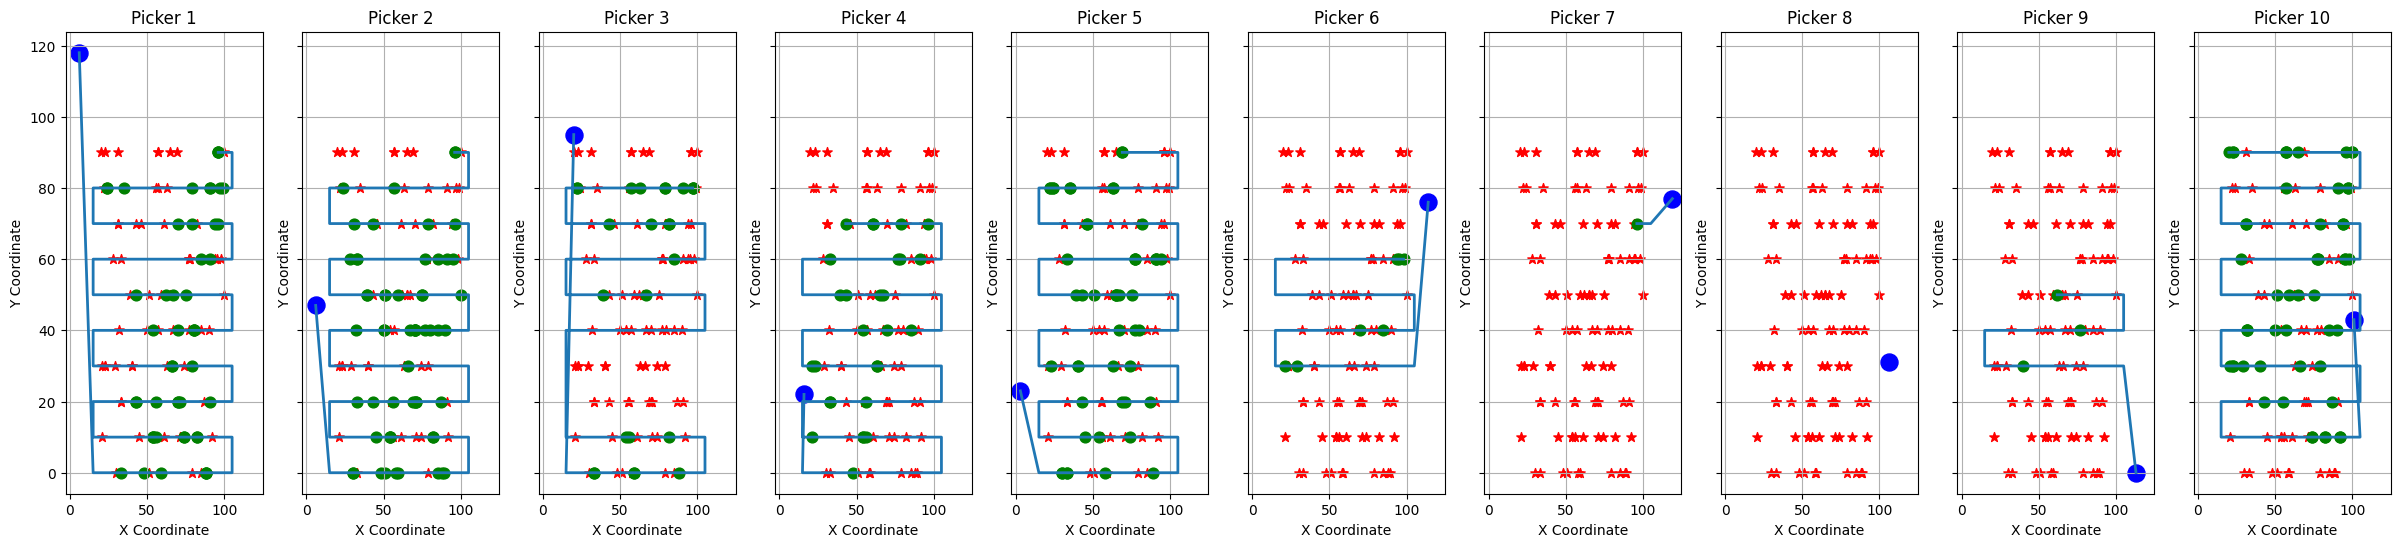

In [ ]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

rows = 100
cols = 100
num_items = 100
num_pickers = 10
MaxIt = 500
nPop = 50 #number of population
pc = 0.90;  #probability of crossover
pm = 0.04 ; #probability of mutation
nc = 2*round((nPop*pc)/2);  #No. of crossover
nm = round(nPop*pm)
beta=0.1
TournmentSize = 5

start_row = 0
step_between_rows = 10
number_of_lines = 10
selected_rows = [start_row + i * step_between_rows for i in range(number_of_lines)]

#random.seed(42)
picker_locations = [(6, 118), (6, 47), (20, 95), (16, 22), (3, 23), (114, 76), (119, 77), (106, 31), (113, 0), (101, 43)]
item_locations=[(89, 0), (59, 0), (85, 0), (79, 0), (30, 0), (33, 0), (88, 0), (58, 0), (51, 0), (48, 0), (54, 10), (56, 10), (54, 10), (45, 10), (21, 10), (82, 10), (71, 10), (92, 10), (74, 10), (61, 10), (55, 20), (69, 20), (87, 20), (71, 20), (43, 20), (33, 20), (56, 20), (70, 20), (91, 20), (33, 20), (79, 30), (40, 30), (40, 30), (74, 30), (21, 30), (66, 30), (23, 30), (63, 30), (23, 30), (29, 30), (80, 40), (67, 40), (77, 40), (50, 40), (57, 40), (54, 40), (90, 40), (85, 40), (32, 40), (70, 40), (75, 50), (62, 50), (65, 50), (59, 50), (65, 50), (100, 50), (51, 50), (43, 50), (67, 50), (39, 50), (95, 60), (98, 60), (85, 60), (94, 60), (78, 60), (33, 60), (77, 60), (77, 60), (91, 60), (28, 60), (43, 70), (31, 70), (46, 70), (94, 70), (82, 70), (31, 70), (79, 70), (61, 70), (96, 70), (70, 70), (35, 80), (63, 80), (56, 80), (22, 80), (79, 80), (24, 80), (97, 80), (57, 80), (99, 80), (91, 80), (69, 90), (23, 90), (96, 90), (20, 90), (57, 90), (100, 90), (96, 90), (65, 90), (57, 90), (31, 90)]
num_orders = 100
orders = {}

for i in range(0, num_orders):

    num_items_in_order = random.randint(1, 5)

    selected_items = random.choices(item_locations, k=num_items_in_order)

    orders[i] = selected_items

for order, items in orders.items():
    print(f"{order}: {items}")
# picker_locations = []
# for i in range(num_pickers//2):
#     picker_locations.append((random.randint(0,20),random.randint(0,120)))
# for i in range(num_pickers//2):
#     picker_locations.append((random.randint(100,120),random.randint(0,120)))
#item_locations = [(65, 41), (42, 66), (74, 18), (44, 54), (31, 92), (89, 11), (64, 62), (41, 38), (24, 13), (32, 59), (49, 69), (34, 38), (67, 31), (41, 82), (83, 1), (79, 90), (30, 10), (33, 100), (96, 12), (58, 71), (41, 86), (21, 29), (42, 86), (60, 14), (89, 38), (97, 63), (73, 37), (96, 14), (90, 34), (99, 15), (34, 39), (38, 70), (37, 50), (61, 45), (49, 18), (95, 1), (40, 10), (79, 97), (85, 42), (70, 39), (56, 46), (82, 18), (41, 39), (53, 33), (63, 53), (20, 23), (29, 74), (44, 52), (81, 84), (49, 53), (70, 23), (22, 26), (99, 63), (64, 80), (31, 40), (47, 78), (66, 7), (74, 33), (53, 96), (87, 72), (37, 50), (51, 67), (79, 77), (41, 96), (89, 39), (34, 76), (81, 7), (38, 26), (30, 43), (27, 9), (66, 87), (41, 2), (62, 50), (95, 70), (25, 24), (93, 1), (22, 88), (43, 61), (36, 24), (58, 43), (38, 40), (62, 83), (72, 60), (100, 48), (31, 73), (79, 21), (43, 81), (22, 28), (37, 36), (65, 69), (52, 51), (91, 26), (96, 64), (52, 50), (45, 47), (47, 48), (30, 46), (55, 32), (100, 47), (55, 67)]
#for i in range(num_items):
  #  item_locations.append((random.randint(20,cols),random.randint(0,rows)))
print(picker_locations)
picker_locations1 = picker_locations.copy()


# item_locations = []
# for row in selected_rows:
#     for i in range(10):
#         # Append random column positions (column_start to column_end) for the given row
#         item_locations.append((random.randint(20, 100), row))
print(item_locations)

#Tournament
def tournament_selection(population, TournmentSize):

    tournament_contestants = random.sample(population, TournmentSize)
    #print("tournament_contestants",population)
    winner = sorted(tournament_contestants, key=lambda x: x[1])[0]
    return winner[0]

#fitness with sorted paths
def calc_distance_with_shortest_route(picker_locations, item_locations, emptypop_position):

      left_walkway=15
      right_walkway=105

      assignments = [[] for _ in range(num_pickers)]
      for index, picker_index in enumerate(emptypop_position):
          assignments[picker_index].extend(orders[index])

      sorted_data = [[] for _ in range(num_pickers)]

      total_fitness_score=0

      # sorted_data = []

      for i in range(len(picker_locations)):
          data=assignments[i]
          quotients = {}
          for item in data:
              quotient = item[1] // 10
              if quotient not in quotients:
                  quotients[quotient] = []
              quotients[quotient].append(item)

          for quotient in sorted(quotients.keys()):
              group = quotients[quotient]
              if quotient % 2 != 0:  # Even
                  sorted_group = sorted(group, key=lambda x: x[0], reverse=True)
              else:  # Odd
                  sorted_group = sorted(group, key=lambda x: x[0])
              sorted_data[i].extend(sorted_group)

#both unfavourable entry
      for p in range(len(picker_locations)):
        if not sorted_data[p]:
          continue
        if picker_locations[p][0] < 50:
          if sorted_data[p][0][1] % 20 != 0 and sorted_data[p][-1][1] % 20 != 0:
                sorted_data[p].insert(0,picker_locations[p])
                # sorted_data[p].insert(1,(picker_locations[p][0],sorted_data[p][0][1]-step_between_rows))
                # sorted_data[p].insert(2,(right_walkway,sorted_data[p][0][1]-step_between_rows))
                # sorted_data[p].insert(3,(right_walkway,sorted_data[p][0][1]))


        else:
          if sorted_data[p][0][1]%20 == 0 and sorted_data[p][-1][1]%20 ==0:
            sorted_data[p].insert(0,picker_locations[p])
            # sorted_data[p].insert(1,(picker_locations[p][0],sorted_data[p][0][1]))
            # sorted_data[p].insert(2,(left_walkway,sorted_data[p][0][1]-step_between_rows))
            # sorted_data[p].insert(3,(left_walkway,sorted_data[p][0][1]))


#one favourable entry
      for p in range(len(picker_locations)):
        if not sorted_data[p]:
          continue
        if picker_locations[p][0] < 50:
          if sorted_data[p][0][1]%20 == 0 and sorted_data[p][-1][1]%20 !=0:
            sorted_data[p].insert(0,picker_locations[p])
          elif sorted_data[p][0][1]%20 != 0 and sorted_data[p][-1][1]%20 ==0:
            sorted_data[p]=sorted_data[p][::-1]
            sorted_data[p].insert(0,picker_locations[p])

        else:
          if sorted_data[p][0][1]%20 != 0 and sorted_data[p][-1][1]%20 ==0:
            sorted_data[p].insert(0,picker_locations[p])
          elif sorted_data[p][0][1]%20 == 0 and sorted_data[p][-1][1]%20 !=0:
            sorted_data[p]=sorted_data[p][::-1]
            sorted_data[p].insert(0,picker_locations[p])

#both favourable
      for p in range(len(picker_locations)):
        if not sorted_data[p]:
          continue
        if picker_locations[p][0] < 50:
          if sorted_data[p][0][1]%20 == 0 and sorted_data[p][-1][1]%20 ==0:
            sorted_data[p].insert(0,picker_locations[p])
        else:
          if sorted_data[p][0][1]%20 != 0 and sorted_data[p][-1][1]%20 !=0:
            sorted_data[p].insert(0,picker_locations[p])

      l=[]

      for k in sorted_data:
        if not k:
              l.append([])
              continue
        l1 = k.copy()
        if k[1][1] % 20 != 0:
            l1.insert(1, (right_walkway, k[1][1]))
        else:
            l1.insert(1, (left_walkway, k[1][1]))

        i = 1
        while i < len(l1) - 1:
            if l1[i][1] != l1[i + 1][1]:
                if l1[i][1] % 20 == 0:
                    if l1[i + 1][1] % 20 != 0:

                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, l1[i + 2][1]))
                        i += 2
                    else:
                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, (l1[i + 2][1] - step_between_rows)))
                        l1.insert(i + 3, (left_walkway, (l1[i + 3][1] - step_between_rows)))
                        l1.insert(i + 4, (left_walkway, l1[i + 4][1]))
                        i += 4
                else:
                    if l1[i + 1][1] % 20 == 0:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, l1[i + 2][1]))
                        i += 2
                    else:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, (l1[i + 2][1] - step_between_rows)))
                        l1.insert(i + 3, (right_walkway, (l1[i + 3][1] - step_between_rows)))
                        l1.insert(i + 4, (right_walkway, l1[i + 4][1]))
                        i += 4
            else:
                i += 1
        l.append(l1)
      total_cost = 0
      individual_costs = []
      for points in l:
          list_cost = 0

          for i in range(len(points) - 1):
              x1, y1 = points[i]
              x2, y2 = points[i + 1]
              distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
              list_cost += distance

          individual_costs.append(list_cost)
          total_cost += list_cost

      return total_cost,l,assignments


def crossover(x1, x2):

    q = random.uniform(0, 1)

    if q <= pc:

        g = random.randint(1, 2)

        if g == 1:
            y1, y2 = single_point_crossover(x1, x2)
        elif g == 2:
            y1, y2 = uniform_crossover(x1, x2)

    else:

        y1 = x1[:]
        y2 = x2[:]

    return y1, y2
def single_point_crossover(x1, x2):

    n = len(x1)

    crossover_point = random.randint(1, n - 1)

    y1 = x1[:crossover_point] + x2[crossover_point:]
    y2 = x2[:crossover_point] + x1[crossover_point:]

    return y1, y2

def uniform_crossover(x1, x2):

    n = len(x1)
    y1 = []
    y2 = []


    for i in range(n):
        if random.random() < 0.5:
            y1.append(x1[i])
            y2.append(x2[i])
        else:
            y1.append(x2[i])
            y2.append(x1[i])

    return y1, y2

def mutate(x):

    y = x[:]

    j = np.random.randint(len(x))

    y[j] = np.random.randint(10)

    return y

def main():
    empty_pop = []

    # Initial Population
    for iteration in range(nPop-1):
        emptypop_position = []

        for f in range(num_items):
            picker_id = f % num_pickers
            emptypop_position.append(picker_id)
            #emptypop_position.append(random.randint(0, num_pickers-1))
        random.shuffle(emptypop_position)

        # Use `calc_distance_with_shortest_route()` to calculate fitness and get sorted paths
        fitness_score, sorted_paths,_ = calc_distance_with_shortest_route(picker_locations, item_locations, emptypop_position)
        # b=[8, 3, 8, 8, 3, 3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 8, 7, 3, 3, 7, 7, 7, 3, 3, 3, 7, 7, 3, 9, 3, 3, 9, 3, 9, 3, 9, 3, 3, 9, 9, 9, 3, 3, 3, 9, 9, 3, 9, 9, 9, 9, 9, 9, 9, 1, 1, 9, 1, 9, 9, 9, 9, 9, 1, 9, 9, 9, 1, 2, 2, 2, 5, 5, 2, 9, 2, 5, 9, 2, 2, 2, 2, 5, 2, 5, 2, 5, 5, 2, 2, 5, 2, 2, 5, 5, 2, 2, 2]
        # empty_pop.append([b,2325.0822726980086])
        empty_pop.append([emptypop_position, fitness_score])  # Append individuals with their fitness

    pop = sorted(empty_pop, key=lambda x: x[1])  # Sort population by fitness
    best_solution = pop[0]

    # Genetic Algorithm Loop
    for iteration in range(MaxIt):
        crossover_population = []

        # Crossover
        for c in range(nc // 2):
            parent1 = tournament_selection(pop, TournmentSize)
            parent2 = tournament_selection(pop, TournmentSize)
            offspring1_position, offspring2_position = crossover(parent1, parent2)

            offspring1_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring1_position)
            offspring2_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring2_position)

            crossover_population.append([offspring1_position, offspring1_fitness])
            crossover_population.append([offspring2_position, offspring2_fitness])

        empty_pop.extend(crossover_population)

        # Mutation
        mutation_population = []
        for c in range(nm):
            parent = random.choice(pop)[0]
            offspring_position = mutate(parent)

            offspring_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring_position)

            mutation_population.append([offspring_position, offspring_fitness])

        empty_pop.extend(mutation_population)

        # Select the next generation
        empty_pop = sorted(empty_pop, key=lambda x: x[1])
        pop = empty_pop[:nPop]  # Only take the top `nPop` individuals
        new_best_solution = pop[0]

        print(f"Iteration:{iteration} Best Solution:", new_best_solution[0],new_best_solution[1])

    final_solution = new_best_solution[0]

    # Final output
    print(f"\nFinal Best Solution (Pick Assignments): {final_solution}")

    # Generate orders for each picker based on the final solution
    orders = {picker_id: [] for picker_id in range(num_pickers)}
    for item_id, picker_id in enumerate(final_solution):
        orders[picker_id].append(item_id)

    print("\nOrders for Each Picker:")
    for picker_id, items in orders.items():
        print(f"Picker {picker_id}: Items {items}")

    # Generate **sorted paths** for plotting
    _,sorted_paths,assignments = calc_distance_with_shortest_route(picker_locations, item_locations, final_solution)

    # Plot results with sorted paths
    fig, axes = plt.subplots(nrows=1, ncols=len(picker_locations1), figsize=(30, 6), sharex=True, sharey=True)

    picker_x, picker_y = zip(*picker_locations1)  # Original picker locations
    item_x, item_y = zip(*item_locations)  # All item locations

    for group, ax in enumerate(axes):
        if group >= len(picker_locations1):  # Prevent index errors
            continue

        ax.scatter(*picker_locations1[group], c='blue', s=150, label='Picker Start', marker='o')  # Start picker locations

        ax.scatter(item_x, item_y, c='red', s=50, label='Items', marker='*')

        if group < len(sorted_paths):
            points = [picker_locations1[group]] + sorted_paths[group]

            if len(points) > 1:
                x, y = zip(*points)
                ax.plot(x, y, label=f'Picker {group + 1} Path', linestyle='-', linewidth=2)

        if group < len(assignments):
            assignment_points = assignments[group]
        if assignment_points:
            assign_x, assign_y = zip(*assignment_points)
            ax.scatter(assign_x, assign_y, c='green', s=60, label='Assigned Items', marker='o')

        ax.set_title(f"Picker {group + 1}", fontsize=12)
        ax.set_xlabel("X Coordinate", fontsize=10)
        ax.set_ylabel("Y Coordinate", fontsize=10)
        ax.grid(True)

main()

In [ ]:
    for iteration in range(nPop-1):
        emptypop_position = []

        assigned_counts = [0] * num_pickers

        for f in range(num_items):
            valid_pickers = [i for i in range(num_pickers) if assigned_counts[i] < picker_capacities[i]]
            if not valid_pickers:
                raise ValueError("Not enough picker capacity to assign all items.")

            picker_id = random.choice(valid_pickers)
            assigned_counts[picker_id] += 1
            emptypop_position.append(picker_id)

        random.shuffle(emptypop_position)



In [ ]:
print(emptypop_position)
print(assigned_counts)

[1, 5, 3, 1, 1, 8, 8, 6, 4, 1, 7, 9, 5, 5, 3, 2, 2, 7, 2, 7, 0, 2, 5, 7, 5, 1, 7, 8, 4, 0, 5, 6, 9, 9, 9, 3, 0, 5, 9, 1, 3, 6, 5, 6, 8, 8, 9, 6, 6, 6, 3, 1, 5, 0, 9, 1, 9, 2, 8, 4, 9, 5, 4, 6, 2, 9, 8, 1, 2, 0, 3, 4, 8, 7, 7, 9, 3, 2, 2, 8, 3, 7, 4, 6, 3, 3, 7, 7, 9, 9, 9, 5, 6, 0, 4, 3, 3, 2, 8, 6]
[6, 9, 10, 12, 7, 11, 11, 10, 10, 14]


In [ ]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from itertools import islice

rows = 100
cols = 100
num_items = 100
num_pickers = 10
MaxIt = 1
nPop = 50 #number of population
pc = 0.90;  #probability of crossover
pm = 0.04 ; #probability of mutation
nc = 2*round((nPop*pc)/2);  #No. of crossover
nm = round(nPop*pm)
beta=0.1
TournmentSize = 5

start_row = 0
step_between_rows = 10
number_of_lines = 10
selected_rows = [start_row + i * step_between_rows for i in range(number_of_lines)]

#random.seed(42)
picker_locations = [(6, 118), (6, 47), (14, 95), (12, 22), (3, 23), (114, 76), (119, 77), (106, 31), (113, 0), (101, 43)]
item_locations=[(89, 0), (59, 0), (85, 0), (79, 0), (30, 0), (33, 0), (88, 0), (58, 0), (51, 0), (48, 0), (54, 10), (56, 10), (54, 10), (45, 10), (21, 10), (82, 10), (71, 10), (92, 10), (74, 10), (61, 10), (55, 20), (69, 20), (87, 20), (71, 20), (43, 20), (33, 20), (56, 20), (70, 20), (91, 20), (33, 20), (79, 30), (40, 30), (40, 30), (74, 30), (21, 30), (66, 30), (23, 30), (63, 30), (23, 30), (29, 30), (80, 40), (67, 40), (77, 40), (50, 40), (57, 40), (54, 40), (90, 40), (85, 40), (32, 40), (70, 40), (75, 50), (62, 50), (65, 50), (59, 50), (65, 50), (100, 50), (51, 50), (43, 50), (67, 50), (39, 50), (95, 60), (98, 60), (85, 60), (94, 60), (78, 60), (33, 60), (77, 60), (77, 60), (91, 60), (28, 60), (43, 70), (31, 70), (46, 70), (94, 70), (82, 70), (31, 70), (79, 70), (61, 70), (96, 70), (70, 70), (35, 80), (63, 80), (56, 80), (22, 80), (79, 80), (24, 80), (97, 80), (57, 80), (99, 80), (91, 80), (69, 90), (23, 90), (96, 90), (20, 90), (57, 90), (100, 90), (96, 90), (65, 90), (57, 90), (31, 90)]
picker_capacities = [10, 5, 10, 4, 10, 7, 10, 16, 13, 1]

num_orders = 100

order_org = {}

for i in range(0, num_orders):

    num_items_in_order = random.randint(1, 5)

    selected_items = random.choices(item_locations, k=num_items_in_order)

    order_org[i] = selected_items


orders = dict(islice(order_org.items(),(sum(picker_capacities)-1) ))
remaining_dict = {k: v for k, v in order_org.items() if k not in orders}
print("Remaining Orders to assign",remaining_dict)
# picker_locations = []
# for i in range(num_pickers//2):
#     picker_locations.append((random.randint(0,20),random.randint(0,120)))
# for i in range(num_pickers//2):
#     picker_locations.append((random.randint(100,120),random.randint(0,120)))
#item_locations = [(65, 41), (42, 66), (74, 18), (44, 54), (31, 92), (89, 11), (64, 62), (41, 38), (24, 13), (32, 59), (49, 69), (34, 38), (67, 31), (41, 82), (83, 1), (79, 90), (30, 10), (33, 100), (96, 12), (58, 71), (41, 86), (21, 29), (42, 86), (60, 14), (89, 38), (97, 63), (73, 37), (96, 14), (90, 34), (99, 15), (34, 39), (38, 70), (37, 50), (61, 45), (49, 18), (95, 1), (40, 10), (79, 97), (85, 42), (70, 39), (56, 46), (82, 18), (41, 39), (53, 33), (63, 53), (20, 23), (29, 74), (44, 52), (81, 84), (49, 53), (70, 23), (22, 26), (99, 63), (64, 80), (31, 40), (47, 78), (66, 7), (74, 33), (53, 96), (87, 72), (37, 50), (51, 67), (79, 77), (41, 96), (89, 39), (34, 76), (81, 7), (38, 26), (30, 43), (27, 9), (66, 87), (41, 2), (62, 50), (95, 70), (25, 24), (93, 1), (22, 88), (43, 61), (36, 24), (58, 43), (38, 40), (62, 83), (72, 60), (100, 48), (31, 73), (79, 21), (43, 81), (22, 28), (37, 36), (65, 69), (52, 51), (91, 26), (96, 64), (52, 50), (45, 47), (47, 48), (30, 46), (55, 32), (100, 47), (55, 67)]
#for i in range(num_items):
  #  item_locations.append((random.randint(20,cols),random.randint(0,rows)))
print(picker_locations)
picker_locations1 = picker_locations.copy()


# item_locations = []
# for row in selected_rows:
#     for i in range(10):
#         # Append random column positions (column_start to column_end) for the given row
#         item_locations.append((random.randint(20, 100), row))
print(item_locations)


def e_d(picker_location,item_location):
        x1, y1 = picker_location
        x2, y2 = item_location
        distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        return distance

def walkway_from_condition(value, left_walkway, right_walkway):
      return left_walkway if value % 20 == 0 else right_walkway
#Tournament
def tournament_selection(population, TournmentSize):

    tournament_contestants = random.sample(population, TournmentSize)
    winner = sorted(tournament_contestants, key=lambda x: x[1])[0]
    return winner[0]

#fitness with sorted paths
def calc_distance_with_shortest_route(picker_locations, item_locations, emptypop_position):

      left_walkway=15
      right_walkway=105

      assignments = [[] for _ in range(num_pickers)]
      for index, picker_index in enumerate(emptypop_position):
          assignments[picker_index].extend(orders[index])

      sorted_data = [[] for _ in range(num_pickers)]

      total_fitness_score=0

      for i in range(len(picker_locations)):
          data=assignments[i]
          quotients = {}
          for item in data:
              quotient = item[1] // 10
              if quotient not in quotients:
                  quotients[quotient] = []
              quotients[quotient].append(item)

          for quotient in sorted(quotients.keys()):
              group = quotients[quotient]
              if quotient % 2 != 0:  # Even
                  sorted_group = sorted(group, key=lambda x: x[0], reverse=True)
              else:  # Odd
                  sorted_group = sorted(group, key=lambda x: x[0])
              sorted_data[i].extend(sorted_group)
      r_flag=[0]*10

      for p in range(len(picker_locations)):
        if not sorted_data[p]:
          continue

        dist1_walkway = walkway_from_condition(sorted_data[p][0][1], left_walkway, right_walkway)
        dist2_walkway = walkway_from_condition(sorted_data[p][-1][1], left_walkway, right_walkway)

        dist1 = e_d(picker_locations[p], (dist1_walkway, sorted_data[p][0][1]))
        dist2 = e_d(picker_locations[p], (dist2_walkway, sorted_data[p][-1][1]))


        if picker_locations[p][0] < 50:
          if dist1<dist2:
            sorted_data[p].insert(0,picker_locations[p])
            if sorted_data[p][1][1]%20 == 0:
              sorted_data[p].insert(1,(left_walkway,sorted_data[p][1][1]))
            else :
              sorted_data[p].insert(1,(left_walkway,sorted_data[p][1][1]-step_between_rows))
          else:
            sorted_data[p]=sorted_data[p][::-1]
            r_flag[p]=1
            sorted_data[p].insert(0,picker_locations[p])
            if sorted_data[p][1][1]%20 ==0:
              sorted_data[p].insert(1,(left_walkway,sorted_data[p][1][1]))
            else:
              sorted_data[p].insert(1,(left_walkway,sorted_data[p][1][1]+step_between_rows))
        else:
          if dist1<dist2:
            if sorted_data[p][0][1]%20 != 0:
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(right_walkway,sorted_data[p][1][1]))
            else:
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(right_walkway,sorted_data[p][1][1]-step_between_rows))
          else:
            r_flag[p]=1
            if sorted_data[p][-1][1]%20 !=0:
              sorted_data[p]=sorted_data[p][::-1]
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(right_walkway,sorted_data[p][1][1]))
            else:
              sorted_data[p]=sorted_data[p][::-1]
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(right_walkway,sorted_data[p][1][1]+step_between_rows))

         # print(r_flag)
      l=[]

      for j,k in enumerate(sorted_data):
        if not k:
              l.append([])
              continue
        l1 = k.copy()

        i = 1
        while i < len(l1) - 1:
            if l1[i][1] != l1[i + 1][1]:
                if l1[i][1] % 20 == 0:
                    if l1[i + 1][1] % 20 != 0:

                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, l1[i + 2][1]))
                        i += 2
                    else:
                      if r_flag[j]==0:
                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, (l1[i + 1][1] + step_between_rows)))
                        l1.insert(i + 3, (left_walkway, (l1[i + 2][1])))
                        l1.insert(i + 4, (left_walkway, l1[i + 4][1]))
                        i += 4
                      else:
                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, (l1[i + 1][1] - step_between_rows)))
                        l1.insert(i + 3, (left_walkway, (l1[i + 2][1])))
                        l1.insert(i + 4, (left_walkway, l1[i + 4][1]))
                        i += 4
                else:
                    if l1[i + 1][1] % 20 == 0:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, l1[i + 2][1]))
                        i += 2
                    else:
                      if r_flag[j]==0:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, (l1[i + 1][1] + step_between_rows))) #i+1 needed
                        l1.insert(i + 3, (right_walkway, (l1[i + 2][1])))#i+2
                        l1.insert(i + 4, (right_walkway, l1[i + 4][1]))
                        i += 4
                      else:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, (l1[i + 1][1] - step_between_rows)))
                        l1.insert(i + 3, (right_walkway, (l1[i + 2][1])))
                        l1.insert(i + 4, (right_walkway, l1[i + 4][1]))
                        i += 4
            else:
                i += 1
        l.append(l1)

      total_cost = 0
      individual_costs = []
      for points in l:
          list_cost = 0

          for i in range(len(points) - 1):
              x1, y1 = points[i]
              x2, y2 = points[i + 1]
              distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
              list_cost += distance

          individual_costs.append(list_cost)
          total_cost += list_cost

      return total_cost,l,assignments


def crossover(x1, x2):

    q = random.uniform(0, 1)

    if q <= pc:

        g = random.randint(1, 2)

        if g == 1:
            y1, y2 = single_point_crossover(x1, x2)
        elif g == 2:
            y1, y2 = uniform_crossover(x1, x2)

        # Ensure offspring satisfy picker capacity constraints
        y1 = enforce_capacity_constraints(y1, picker_capacities)
        y2 = enforce_capacity_constraints(y2, picker_capacities)

    else:

        y1 = x1[:]
        y2 = x2[:]

    return y1, y2


def single_point_crossover(x1, x2):

    n = len(x1)

    crossover_point = random.randint(1, n - 1)

    y1 = x1[:crossover_point] + x2[crossover_point:]
    y2 = x2[:crossover_point] + x1[crossover_point:]

    return y1, y2


def uniform_crossover(x1, x2):

    n = len(x1)
    y1 = []
    y2 = []

    for i in range(n):
        if random.random() < 0.5:
            y1.append(x1[i])
            y2.append(x2[i])
        else:
            y1.append(x2[i])
            y2.append(x1[i])

    return y1, y2


def enforce_capacity_constraints(offspring, picker_capacities):

    # Count how many items are currently assigned to each picker
    assigned_counts = [0] * num_pickers
    for picker_id in offspring:
        assigned_counts[picker_id] += 1

    # Identify pickers that are over their capacity
    over_capacity = {picker_id: count - picker_capacities[picker_id]
                     for picker_id, count in enumerate(assigned_counts) if count > picker_capacities[picker_id]}

    # Reassign items from over-capacity pickers
    for i, picker_id in enumerate(offspring):
        if picker_id in over_capacity and over_capacity[picker_id] > 0:
            # Find a valid picker with available capacity
            valid_pickers = [p for p in range(num_pickers) if assigned_counts[p] < picker_capacities[p]]

            if valid_pickers:
                # Reassign the item to a valid picker
                new_picker = random.choice(valid_pickers)
                offspring[i] = new_picker

                # Update counts
                assigned_counts[picker_id] -= 1
                assigned_counts[new_picker] += 1
                over_capacity[picker_id] -= 1

    return offspring

def mutate_with_capacity(x, picker_capacities):
    y = x[:]
    attempts = 10

    while attempts > 0:  # Try mutating while respecting capacity
        j = np.random.randint(len(x))
        assigned_picker = y[j]
        new_picker = np.random.randint(num_pickers)

        y[j] = new_picker

        # Check capacity constraint
        assigned_counts = [y.count(picker_id) for picker_id in range(num_pickers)]
        if all(assigned_counts[picker_id] <= picker_capacities[picker_id] for picker_id in range(num_pickers)):
            return y  # Valid mutation found

        # Revert and try again
        y[j] = assigned_picker
        attempts -= 1

    return x

def main():
    global orders
    empty_pop = []

    # Initial Population
    for iteration in range(nPop-1):
        emptypop_position = []

        assigned_counts = [0] * num_pickers

        for f in range(len(orders)):
            valid_pickers = [i for i in range(num_pickers) if assigned_counts[i] < picker_capacities[i]]

            picker_id = random.choice(valid_pickers)
            assigned_counts[picker_id] += 1
            emptypop_position.append(picker_id)

        random.shuffle(emptypop_position)

        fitness_score, sorted_paths,_ = calc_distance_with_shortest_route(picker_locations, item_locations, emptypop_position)
        empty_pop.append([emptypop_position, fitness_score])  # Append individuals with their fitness

    pop = sorted(empty_pop, key=lambda x: x[1])  # Sort population by fitness
    best_solution = pop[0]

    # Genetic Algorithm Loop
    for iteration in range(MaxIt):
        crossover_population = []

        # Crossover
        for c in range(nc // 2):
            parent1 = tournament_selection(pop, TournmentSize)
            parent2 = tournament_selection(pop, TournmentSize)
            offspring1_position, offspring2_position = crossover(parent1, parent2)

            offspring1_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring1_position)
            offspring2_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring2_position)

            crossover_population.append([offspring1_position, offspring1_fitness])
            crossover_population.append([offspring2_position, offspring2_fitness])

        empty_pop.extend(crossover_population)

        # Mutation
        mutation_population = []
        for c in range(nm):
            parent = random.choice(pop)[0]
            offspring_position = mutate_with_capacity(parent, picker_capacities)

            offspring_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring_position)

            mutation_population.append([offspring_position, offspring_fitness])

        empty_pop.extend(mutation_population)

        # Select the next generation
        empty_pop = sorted(empty_pop, key=lambda x: x[1])
        pop = empty_pop[:nPop]  # Only take the top `nPop` individuals
        new_best_solution = pop[0]

        print(f"Iteration:{iteration} Best Solution:", new_best_solution[0],new_best_solution[1])

    final_solution = new_best_solution[0]

    # Final output
    print(f"\nFinal Best Solution (Pick Assignments): {final_solution}")

    # Generate orders for each picker based on the final solution
    orders = {picker_id: [] for picker_id in range(num_pickers)}
    for item_id, picker_id in enumerate(final_solution):
        orders[picker_id].append(item_id)

    print("\nOrders for Each Picker:")
    for picker_id, items in orders.items():
        print(f"Picker {picker_id}: Orders {items}")

    # Generate **sorted paths** for plotting
    _,sorted_paths,assignments = calc_distance_with_shortest_route(picker_locations, item_locations, final_solution)

    # Plot results with sorted paths
    fig, axes = plt.subplots(nrows=1, ncols=len(picker_locations1), figsize=(30, 6), sharex=True, sharey=True)

    picker_x, picker_y = zip(*picker_locations1)  # Original picker locations
    item_x, item_y = zip(*item_locations)  # All item locations

    for group, ax in enumerate(axes):
        if group >= len(picker_locations1):  # Prevent index errors
            continue

        ax.scatter(*picker_locations1[group], c='blue', s=150, label='Picker Start', marker='o')  # Start picker locations

        ax.scatter(item_x, item_y, c='red', s=50, label='Items', marker='*')

        if group < len(sorted_paths):
            points = [picker_locations1[group]] + sorted_paths[group]

            if len(points) > 1:
                x, y = zip(*points)
                ax.plot(x, y, label=f'Picker {group + 1} Path', linestyle='-', linewidth=2)

        if group < len(assignments):
            assignment_points = assignments[group]
        if assignment_points:
            assign_x, assign_y = zip(*assignment_points)
            ax.scatter(assign_x, assign_y, c='green', s=60, label='Assigned Items', marker='o')

        ax.set_title(f"Picker {group + 1}", fontsize=12)
        ax.set_xlabel("X Coordinate", fontsize=10)
        ax.set_ylabel("Y Coordinate", fontsize=10)
        ax.grid(True)

main()

Remaining Orders to assign {85: [(98, 60)], 86: [(24, 80), (57, 40)], 87: [(33, 20), (63, 30), (33, 0), (23, 30)], 88: [(58, 0), (59, 0), (79, 0)], 89: [(51, 50)], 90: [(71, 20)], 91: [(85, 40)], 92: [(63, 80), (100, 90)], 93: [(82, 10)], 94: [(77, 40), (75, 50), (79, 30)], 95: [(77, 60), (22, 80), (74, 30), (79, 30)], 96: [(56, 10), (61, 10)], 97: [(71, 10), (23, 30)], 98: [(79, 70), (96, 70), (58, 0)], 99: [(67, 40), (30, 0), (79, 70), (96, 70), (91, 60)]}
[(6, 118), (6, 47), (14, 95), (12, 22), (3, 23), (114, 76), (119, 77), (106, 31), (113, 0), (101, 43)]
[(89, 0), (59, 0), (85, 0), (79, 0), (30, 0), (33, 0), (88, 0), (58, 0), (51, 0), (48, 0), (54, 10), (56, 10), (54, 10), (45, 10), (21, 10), (82, 10), (71, 10), (92, 10), (74, 10), (61, 10), (55, 20), (69, 20), (87, 20), (71, 20), (43, 20), (33, 20), (56, 20), (70, 20), (91, 20), (33, 20), (79, 30), (40, 30), (40, 30), (74, 30), (21, 30), (66, 30), (23, 30), (63, 30), (23, 30), (29, 30), (80, 40), (67, 40), (77, 40), (50, 40), (57

KeyError: 10

0: [(96, 70), (77, 60), (54, 10)]
1: [(33, 20)]
2: [(96, 90), (51, 0), (89, 0)]
3: [(65, 50)]
4: [(39, 50), (91, 80)]
5: [(28, 60), (89, 0), (75, 50), (79, 30), (40, 30)]
6: [(63, 30)]
7: [(79, 80), (74, 10)]
8: [(65, 50), (45, 10)]
9: [(56, 20), (39, 50), (61, 70), (55, 20)]
10: [(30, 0), (21, 10)]
11: [(79, 80), (80, 40), (33, 20)]
12: [(85, 60), (91, 60), (91, 80), (75, 50)]
13: [(90, 40)]
14: [(65, 50)]
15: [(88, 0), (96, 70), (98, 60), (74, 10)]
16: [(66, 30), (90, 40), (74, 10), (23, 30), (48, 0)]
17: [(51, 50), (40, 30)]
18: [(46, 70)]
19: [(79, 70), (63, 30), (20, 90), (51, 0), (50, 40)]
20: [(69, 20), (100, 50), (79, 0), (22, 80)]
21: [(65, 90), (94, 70)]
22: [(33, 60), (57, 80), (79, 0), (43, 70)]
23: [(62, 50), (56, 10), (89, 0), (33, 20), (88, 0)]
24: [(66, 30), (96, 70)]
25: [(50, 40), (87, 20), (21, 30)]
26: [(33, 20), (79, 70), (40, 30), (79, 30), (70, 20)]
27: [(33, 20), (56, 80), (59, 50), (90, 40)]
28: [(23, 30), (90, 40), (62, 50), (23, 30), (61, 70)]
29: [(65, 50), 

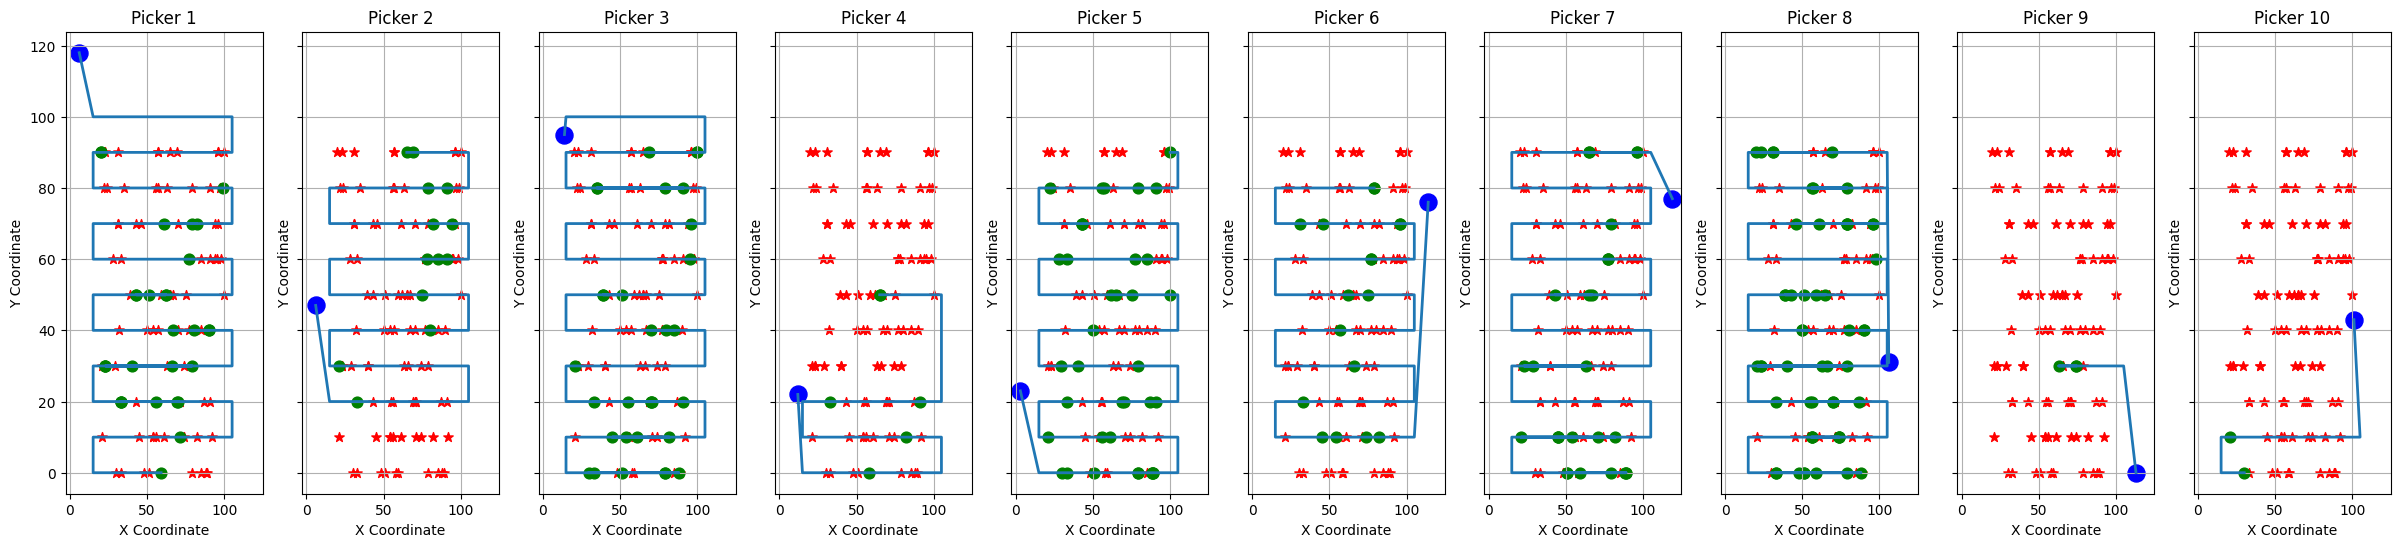

In [ ]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

rows = 100
cols = 100
num_items = 100
num_pickers = 10
MaxIt = 500
nPop = 50 #number of population
pc = 0.90;  #probability of crossover
pm = 0.04 ; #probability of mutation
nc = 2*round((nPop*pc)/2);  #No. of crossover
nm = round(nPop*pm)
beta=0.1
TournmentSize = 5

start_row = 0
step_between_rows = 10
number_of_lines = 10
selected_rows = [start_row + i * step_between_rows for i in range(number_of_lines)]

#random.seed(42)
picker_locations = [(6, 118), (6, 47), (14, 95), (12, 22), (3, 23), (114, 76), (119, 77), (106, 31), (113, 0), (101, 43)]
item_locations=[(89, 0), (59, 0), (85, 0), (79, 0), (30, 0), (33, 0), (88, 0), (58, 0), (51, 0), (48, 0), (54, 10), (56, 10), (54, 10), (45, 10), (21, 10), (82, 10), (71, 10), (92, 10), (74, 10), (61, 10), (55, 20), (69, 20), (87, 20), (71, 20), (43, 20), (33, 20), (56, 20), (70, 20), (91, 20), (33, 20), (79, 30), (40, 30), (40, 30), (74, 30), (21, 30), (66, 30), (23, 30), (63, 30), (23, 30), (29, 30), (80, 40), (67, 40), (77, 40), (50, 40), (57, 40), (54, 40), (90, 40), (85, 40), (32, 40), (70, 40), (75, 50), (62, 50), (65, 50), (59, 50), (65, 50), (100, 50), (51, 50), (43, 50), (67, 50), (39, 50), (95, 60), (98, 60), (85, 60), (94, 60), (78, 60), (33, 60), (77, 60), (77, 60), (91, 60), (28, 60), (43, 70), (31, 70), (46, 70), (94, 70), (82, 70), (31, 70), (79, 70), (61, 70), (96, 70), (70, 70), (35, 80), (63, 80), (56, 80), (22, 80), (79, 80), (24, 80), (97, 80), (57, 80), (99, 80), (91, 80), (69, 90), (23, 90), (96, 90), (20, 90), (57, 90), (100, 90), (96, 90), (65, 90), (57, 90), (31, 90)]
picker_capacities = [10, 5, 10, 4, 10, 7, 10, 16, 3, 1]

num_orders = 100

orders = []

for i in range(0, num_orders):

    num_items_in_order = random.randint(1, 5)

    selected_items = random.choices(item_locations, k=num_items_in_order)

    orders.append(selected_items)
orders_assign=orders[:sum(picker_capacities)]
for order, items in enumerate(orders_assign):
    print(f"{order}: {items}")

print("Pending items")
for order, items in enumerate(orders[sum(picker_capacities)::]):
    print(f"{sum(picker_capacities)+order}: {items}")
# picker_locations = []
# for i in range(num_pickers//2):
#     picker_locations.append((random.randint(0,20),random.randint(0,120)))
# for i in range(num_pickers//2):
#     picker_locations.append((random.randint(100,120),random.randint(0,120)))
#item_locations = [(65, 41), (42, 66), (74, 18), (44, 54), (31, 92), (89, 11), (64, 62), (41, 38), (24, 13), (32, 59), (49, 69), (34, 38), (67, 31), (41, 82), (83, 1), (79, 90), (30, 10), (33, 100), (96, 12), (58, 71), (41, 86), (21, 29), (42, 86), (60, 14), (89, 38), (97, 63), (73, 37), (96, 14), (90, 34), (99, 15), (34, 39), (38, 70), (37, 50), (61, 45), (49, 18), (95, 1), (40, 10), (79, 97), (85, 42), (70, 39), (56, 46), (82, 18), (41, 39), (53, 33), (63, 53), (20, 23), (29, 74), (44, 52), (81, 84), (49, 53), (70, 23), (22, 26), (99, 63), (64, 80), (31, 40), (47, 78), (66, 7), (74, 33), (53, 96), (87, 72), (37, 50), (51, 67), (79, 77), (41, 96), (89, 39), (34, 76), (81, 7), (38, 26), (30, 43), (27, 9), (66, 87), (41, 2), (62, 50), (95, 70), (25, 24), (93, 1), (22, 88), (43, 61), (36, 24), (58, 43), (38, 40), (62, 83), (72, 60), (100, 48), (31, 73), (79, 21), (43, 81), (22, 28), (37, 36), (65, 69), (52, 51), (91, 26), (96, 64), (52, 50), (45, 47), (47, 48), (30, 46), (55, 32), (100, 47), (55, 67)]
#for i in range(num_items):
  #  item_locations.append((random.randint(20,cols),random.randint(0,rows)))
print(picker_locations)
picker_locations1 = picker_locations.copy()


# item_locations = []
# for row in selected_rows:
#     for i in range(10):
#         # Append random column positions (column_start to column_end) for the given row
#         item_locations.append((random.randint(20, 100), row))
print(item_locations)


def e_d(picker_location,item_location):
        x1, y1 = picker_location
        x2, y2 = item_location
        distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        return distance

def walkway_from_condition(value, left_walkway, right_walkway):
      return left_walkway if value % 20 == 0 else right_walkway
#Tournament
def tournament_selection(population, TournmentSize):

    tournament_contestants = random.sample(population, TournmentSize)
    winner = sorted(tournament_contestants, key=lambda x: x[1])[0]
    return winner[0]

#fitness with sorted paths
def calc_distance_with_shortest_route(picker_locations, item_locations, emptypop_position):

      left_walkway=15
      right_walkway=105

      assignments = [[] for _ in range(len(orders_assign))]
      for index, picker_index in enumerate(emptypop_position):
          assignments[picker_index].extend(orders_assign[index])

      sorted_data = [[] for _ in range(num_pickers)]

      total_fitness_score=0

      for i in range(len(picker_locations)):
          data=assignments[i]
          quotients = {}
          for item in data:
              quotient = item[1] // 10
              if quotient not in quotients:
                  quotients[quotient] = []
              quotients[quotient].append(item)

          for quotient in sorted(quotients.keys()):
              group = quotients[quotient]
              if quotient % 2 != 0:  # Even
                  sorted_group = sorted(group, key=lambda x: x[0], reverse=True)
              else:  # Odd
                  sorted_group = sorted(group, key=lambda x: x[0])
              sorted_data[i].extend(sorted_group)
      r_flag=[0]*10

      for p in range(len(picker_locations)):
        if not sorted_data[p]:
          continue

        dist1_walkway = walkway_from_condition(sorted_data[p][0][1], left_walkway, right_walkway)
        dist2_walkway = walkway_from_condition(sorted_data[p][-1][1], left_walkway, right_walkway)

        dist1 = e_d(picker_locations[p], (dist1_walkway, sorted_data[p][0][1]))
        dist2 = e_d(picker_locations[p], (dist2_walkway, sorted_data[p][-1][1]))


        if picker_locations[p][0] < 50:
          if dist1<dist2:
            sorted_data[p].insert(0,picker_locations[p])
            if sorted_data[p][1][1]%20 == 0:
              sorted_data[p].insert(1,(left_walkway,sorted_data[p][1][1]))
            else :
              sorted_data[p].insert(1,(left_walkway,sorted_data[p][1][1]-step_between_rows))
          else:
            sorted_data[p]=sorted_data[p][::-1]
            r_flag[p]=1
            sorted_data[p].insert(0,picker_locations[p])
            if sorted_data[p][1][1]%20 ==0:
              sorted_data[p].insert(1,(left_walkway,sorted_data[p][1][1]))
            else:
              sorted_data[p].insert(1,(left_walkway,sorted_data[p][1][1]+step_between_rows))
        else:
          if dist1<dist2:
            if sorted_data[p][0][1]%20 != 0:
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(right_walkway,sorted_data[p][1][1]))
            else:
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(right_walkway,sorted_data[p][1][1]-step_between_rows))
          else:
            r_flag[p]=1
            if sorted_data[p][-1][1]%20 !=0:
              sorted_data[p]=sorted_data[p][::-1]
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(right_walkway,sorted_data[p][1][1]))
            else:
              sorted_data[p]=sorted_data[p][::-1]
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(right_walkway,sorted_data[p][1][1]+step_between_rows))

         # print(r_flag)
      l=[]

      for j,k in enumerate(sorted_data):
        if not k:
              l.append([])
              continue
        l1 = k.copy()

        i = 1
        while i < len(l1) - 1:
            if l1[i][1] != l1[i + 1][1]:
                if l1[i][1] % 20 == 0:
                    if l1[i + 1][1] % 20 != 0:

                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, l1[i + 2][1]))
                        i += 2
                    else:
                      if r_flag[j]==0:
                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, (l1[i + 1][1] + step_between_rows)))
                        l1.insert(i + 3, (left_walkway, (l1[i + 2][1])))
                        l1.insert(i + 4, (left_walkway, l1[i + 4][1]))
                        i += 4
                      else:
                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, (l1[i + 1][1] - step_between_rows)))
                        l1.insert(i + 3, (left_walkway, (l1[i + 2][1])))
                        l1.insert(i + 4, (left_walkway, l1[i + 4][1]))
                        i += 4
                else:
                    if l1[i + 1][1] % 20 == 0:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, l1[i + 2][1]))
                        i += 2
                    else:
                      if r_flag[j]==0:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, (l1[i + 1][1] + step_between_rows))) #i+1 needed
                        l1.insert(i + 3, (right_walkway, (l1[i + 2][1])))#i+2
                        l1.insert(i + 4, (right_walkway, l1[i + 4][1]))
                        i += 4
                      else:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, (l1[i + 1][1] - step_between_rows)))
                        l1.insert(i + 3, (right_walkway, (l1[i + 2][1])))
                        l1.insert(i + 4, (right_walkway, l1[i + 4][1]))
                        i += 4
            else:
                i += 1
        l.append(l1)

      total_cost = 0
      individual_costs = []
      for points in l:
          list_cost = 0

          for i in range(len(points) - 1):
              x1, y1 = points[i]
              x2, y2 = points[i + 1]
              distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
              list_cost += distance

          individual_costs.append(list_cost)
          total_cost += list_cost

      return total_cost,l,assignments


def crossover(x1, x2):

    q = random.uniform(0, 1)

    if q <= pc:

        g = random.randint(1, 2)

        if g == 1:
            y1, y2 = single_point_crossover(x1, x2)
        elif g == 2:
            y1, y2 = uniform_crossover(x1, x2)

        # Ensure offspring satisfy picker capacity constraints
        y1 = enforce_capacity_constraints(y1, picker_capacities)
        y2 = enforce_capacity_constraints(y2, picker_capacities)

    else:

        y1 = x1[:]
        y2 = x2[:]

    return y1, y2


def single_point_crossover(x1, x2):

    n = len(x1)

    crossover_point = random.randint(1, n - 1)

    y1 = x1[:crossover_point] + x2[crossover_point:]
    y2 = x2[:crossover_point] + x1[crossover_point:]

    return y1, y2


def uniform_crossover(x1, x2):

    n = len(x1)
    y1 = []
    y2 = []

    for i in range(n):
        if random.random() < 0.5:
            y1.append(x1[i])
            y2.append(x2[i])
        else:
            y1.append(x2[i])
            y2.append(x1[i])

    return y1, y2


def enforce_capacity_constraints(offspring, picker_capacities):

    # Count how many items are currently assigned to each picker
    assigned_counts = [0] * num_pickers
    for picker_id in offspring:
        assigned_counts[picker_id] += 1

    # Identify pickers that are over their capacity
    over_capacity = {picker_id: count - picker_capacities[picker_id]
                     for picker_id, count in enumerate(assigned_counts) if count > picker_capacities[picker_id]}

    # Reassign items from over-capacity pickers
    for i, picker_id in enumerate(offspring):
        if picker_id in over_capacity and over_capacity[picker_id] > 0:
            # Find a valid picker with available capacity
            valid_pickers = [p for p in range(num_pickers) if assigned_counts[p] < picker_capacities[p]]

            if valid_pickers:
                # Reassign the item to a valid picker
                new_picker = random.choice(valid_pickers)
                offspring[i] = new_picker

                # Update counts
                assigned_counts[picker_id] -= 1
                assigned_counts[new_picker] += 1
                over_capacity[picker_id] -= 1

    return offspring

def mutate_with_capacity(x, picker_capacities):
    y = x[:]
    attempts = 10

    while attempts > 0:  # Try mutating while respecting capacity
        j = np.random.randint(len(x))
        assigned_picker = y[j]
        new_picker = np.random.randint(num_pickers)

        y[j] = new_picker

        # Check capacity constraint
        assigned_counts = [y.count(picker_id) for picker_id in range(num_pickers)]
        if all(assigned_counts[picker_id] <= picker_capacities[picker_id] for picker_id in range(num_pickers)):
            return y  # Valid mutation found

        # Revert and try again
        y[j] = assigned_picker
        attempts -= 1

    return x

def main():
    empty_pop = []
    global orders
    # Initial Population
    for iteration in range(nPop-1):
        emptypop_position = []

        assigned_counts = [0] * num_pickers

        for f in range(len(orders_assign)):
            valid_pickers = [i for i in range(num_pickers) if assigned_counts[i] < picker_capacities[i]]

            picker_id = random.choice(valid_pickers)
            assigned_counts[picker_id] += 1
            emptypop_position.append(picker_id)

        random.shuffle(emptypop_position)

        fitness_score, sorted_paths,_ = calc_distance_with_shortest_route(picker_locations, item_locations, emptypop_position)
        empty_pop.append([emptypop_position, fitness_score])  # Append individuals with their fitness

    pop = sorted(empty_pop, key=lambda x: x[1])  # Sort population by fitness
    best_solution = pop[0]

    # Genetic Algorithm Loop
    for iteration in range(MaxIt):
        crossover_population = []

        # Crossover
        for c in range(nc // 2):
            parent1 = tournament_selection(pop, TournmentSize)
            parent2 = tournament_selection(pop, TournmentSize)
            offspring1_position, offspring2_position = crossover(parent1, parent2)

            offspring1_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring1_position)
            offspring2_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring2_position)

            crossover_population.append([offspring1_position, offspring1_fitness])
            crossover_population.append([offspring2_position, offspring2_fitness])

        empty_pop.extend(crossover_population)

        # Mutation
        mutation_population = []
        for c in range(nm):
            parent = random.choice(pop)[0]
            offspring_position = mutate_with_capacity(parent, picker_capacities)

            offspring_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring_position)

            mutation_population.append([offspring_position, offspring_fitness])

        empty_pop.extend(mutation_population)

        # Select the next generation
        empty_pop = sorted(empty_pop, key=lambda x: x[1])
        pop = empty_pop[:nPop]  # Only take the top `nPop` individuals
        new_best_solution = pop[0]

        print(f"Iteration:{iteration} Best Solution:", new_best_solution[0],new_best_solution[1])

    final_solution = new_best_solution[0]

    # Final output
    print(f"\nFinal Best Solution (Pick Assignments): {final_solution}")

    # Generate orders for each picker based on the final solution
    orders = {picker_id: [] for picker_id in range(num_pickers)}
    for item_id, picker_id in enumerate(final_solution):
        orders[picker_id].append(item_id)

    print("\nOrders for Each Picker:")
    for picker_id, items in orders.items():
        print(f"Picker {picker_id}: Orders {items}")

    # Generate **sorted paths** for plotting
    _,sorted_paths,assignments = calc_distance_with_shortest_route(picker_locations, item_locations, final_solution)

    # Plot results with sorted paths
    fig, axes = plt.subplots(nrows=1, ncols=len(picker_locations1), figsize=(30, 6), sharex=True, sharey=True)

    picker_x, picker_y = zip(*picker_locations1)  # Original picker locations
    item_x, item_y = zip(*item_locations)  # All item locations

    for group, ax in enumerate(axes):
        if group >= len(picker_locations1):  # Prevent index errors
            continue

        ax.scatter(*picker_locations1[group], c='blue', s=150, label='Picker Start', marker='o')  # Start picker locations

        ax.scatter(item_x, item_y, c='red', s=50, label='Items', marker='*')

        if group < len(sorted_paths):
            points = [picker_locations1[group]] + sorted_paths[group]

            if len(points) > 1:
                x, y = zip(*points)
                ax.plot(x, y, label=f'Picker {group + 1} Path', linestyle='-', linewidth=2)

        if group < len(assignments):
            assignment_points = assignments[group]
        if assignment_points:
            assign_x, assign_y = zip(*assignment_points)
            ax.scatter(assign_x, assign_y, c='green', s=60, label='Assigned Items', marker='o')

        ax.set_title(f"Picker {group + 1}", fontsize=12)
        ax.set_xlabel("X Coordinate", fontsize=10)
        ax.set_ylabel("Y Coordinate", fontsize=10)
        ax.grid(True)

main()

# ***                                 Hybridization***

---



# ***Expanded warehouse, 1000x1000, 1000 order , 100 picker***

In [ ]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

rows = 1000
cols = 1000
num_items = 100
num_pickers = 100
MaxIt = 100
nPop = 50 #number of population
pc = 0.90;  #probability of crossover
pm = 0.04 ; #probability of mutation
nc = 2*round((nPop*pc)/2);  #No. of crossover
nm = round(nPop*pm)
beta=0.1
TournmentSize = 5

alpha = 1.0         # Influence of pheromone trails
beta = 2.0          # Influence of heuristic information
rho = 0.5           # Evaporation rate
Q = 100             # Constant used to update the pheromone
num_ants = 25

start_row = 0
step_between_rows = 10
number_of_lines = 1000
selected_rows = [start_row + i * step_between_rows for i in range(number_of_lines)]

#random.seed(42)
# picker_locations = [(6, 118), (6, 47), (14, 95), (12, 22), (3, 23), (114, 76), (119, 77), (106, 31), (113, 0), (101, 43)]
# item_locations=[(89, 0), (59, 0), (85, 0), (79, 0), (30, 0), (33, 0), (88, 0), (58, 0), (51, 0), (48, 0), (54, 10), (56, 10), (54, 10), (45, 10), (21, 10), (82, 10), (71, 10), (92, 10), (74, 10), (61, 10), (55, 20), (69, 20), (87, 20), (71, 20), (43, 20), (33, 20), (56, 20), (70, 20), (91, 20), (33, 20), (79, 30), (40, 30), (40, 30), (74, 30), (21, 30), (66, 30), (23, 30), (63, 30), (23, 30), (29, 30), (80, 40), (67, 40), (77, 40), (50, 40), (57, 40), (54, 40), (90, 40), (85, 40), (32, 40), (70, 40), (75, 50), (62, 50), (65, 50), (59, 50), (65, 50), (100, 50), (51, 50), (43, 50), (67, 50), (39, 50), (95, 60), (98, 60), (85, 60), (94, 60), (78, 60), (33, 60), (77, 60), (77, 60), (91, 60), (28, 60), (43, 70), (31, 70), (46, 70), (94, 70), (82, 70), (31, 70), (79, 70), (61, 70), (96, 70), (70, 70), (35, 80), (63, 80), (56, 80), (22, 80), (79, 80), (24, 80), (97, 80), (57, 80), (99, 80), (91, 80), (69, 90), (23, 90), (96, 90), (20, 90), (57, 90), (100, 90), (96, 90), (65, 90), (57, 90), (31, 90)]
# picker_capacities = [140, 10, 300, 200, 10, 10, 100, 10, 100, 1]

def generate_simple_list(size, total):
    numbers = [1] * size
    remaining = total - size

    for _ in range(remaining):
        numbers[random.randint(0, size - 1)] += 1  # Increment random indices

    return numbers

picker_capacities = generate_simple_list(100, 955)

picker_locations = []
for i in range(num_pickers//2):
    picker_locations.append((random.randint(0,200),random.randint(0,1200)))
for i in range(num_pickers//2):
    picker_locations.append((random.randint(1000,1200),random.randint(0,1200)))
# item_locations = [(65, 41), (42, 66), (74, 18), (44, 54), (31, 92), (89, 11), (64, 62), (41, 38), (24, 13), (32, 59), (49, 69), (34, 38), (67, 31), (41, 82), (83, 1), (79, 90), (30, 10), (33, 100), (96, 12), (58, 71), (41, 86), (21, 29), (42, 86), (60, 14), (89, 38), (97, 63), (73, 37), (96, 14), (90, 34), (99, 15), (34, 39), (38, 70), (37, 50), (61, 45), (49, 18), (95, 1), (40, 10), (79, 97), (85, 42), (70, 39), (56, 46), (82, 18), (41, 39), (53, 33), (63, 53), (20, 23), (29, 74), (44, 52), (81, 84), (49, 53), (70, 23), (22, 26), (99, 63), (64, 80), (31, 40), (47, 78), (66, 7), (74, 33), (53, 96), (87, 72), (37, 50), (51, 67), (79, 77), (41, 96), (89, 39), (34, 76), (81, 7), (38, 26), (30, 43), (27, 9), (66, 87), (41, 2), (62, 50), (95, 70), (25, 24), (93, 1), (22, 88), (43, 61), (36, 24), (58, 43), (38, 40), (62, 83), (72, 60), (100, 48), (31, 73), (79, 21), (43, 81), (22, 28), (37, 36), (65, 69), (52, 51), (91, 26), (96, 64), (52, 50), (45, 47), (47, 48), (30, 46), (55, 32), (100, 47), (55, 67)]

item_locations = []
for row in selected_rows:
    for i in range(10):
        # Append random column positions (column_start to column_end) for the given row
        item_locations.append((random.randint(250, 1000), row))

num_orders = 1000

orders = []

for i in range(0, num_orders):

    num_items_in_order = random.randint(1, 5)

    selected_items = random.choices(item_locations, k=num_items_in_order)

    orders.append(selected_items)
orders_assign=orders[:sum(picker_capacities)]
for order, items in enumerate(orders_assign):
    print(f"{order}: {items}")

print("Pending items")
for order, items in enumerate(orders[sum(picker_capacities)::]):
    print(f"{sum(picker_capacities)+order}: {items}")

print(picker_locations)
picker_locations1 = picker_locations.copy()


print(item_locations)


def e_d(picker_location,item_location):
        x1, y1 = picker_location
        x2, y2 = item_location
        distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        return distance

def walkway_from_condition(value, left_walkway, right_walkway):
      return left_walkway if value % 20 == 0 else right_walkway
#Tournament
def tournament_selection(population, TournmentSize):

    tournament_contestants = random.sample(population, TournmentSize)
    winner = sorted(tournament_contestants, key=lambda x: x[1])[0]
    return winner[0]

#fitness with sorted paths
def calc_distance_with_shortest_route(picker_locations, item_locations, emptypop_position):

      left_walkway=150
      right_walkway=1050

      assignments = [[] for _ in range(len(orders_assign))]
      for index, picker_index in enumerate(emptypop_position):
          assignments[picker_index].extend(orders_assign[index])

      sorted_data = [[] for _ in range(num_pickers)]

      total_fitness_score=0

      for i in range(len(picker_locations)):
          data=assignments[i]
          quotients = {}
          for item in data:
              quotient = item[1] // 10
              if quotient not in quotients:
                  quotients[quotient] = []
              quotients[quotient].append(item)

          for quotient in sorted(quotients.keys()):
              group = quotients[quotient]
              if quotient % 2 != 0:  # Even
                  sorted_group = sorted(group, key=lambda x: x[0], reverse=True)
              else:  # Odd
                  sorted_group = sorted(group, key=lambda x: x[0])
              sorted_data[i].extend(sorted_group)
      r_flag=[0]*num_pickers

      for p in range(len(picker_locations)):
        if not sorted_data[p]:
          continue

        dist1_walkway = walkway_from_condition(sorted_data[p][0][1], left_walkway, right_walkway)
        dist2_walkway = walkway_from_condition(sorted_data[p][-1][1], left_walkway, right_walkway)

        dist1 = e_d(picker_locations[p], (dist1_walkway, sorted_data[p][0][1]))
        dist2 = e_d(picker_locations[p], (dist2_walkway, sorted_data[p][-1][1]))


        if picker_locations[p][0] < 50:
          if dist1<dist2:
            sorted_data[p].insert(0,picker_locations[p])
            if sorted_data[p][1][1]%20 == 0:
              sorted_data[p].insert(1,(left_walkway,sorted_data[p][1][1]))
            else :
              sorted_data[p].insert(1,(left_walkway,sorted_data[p][1][1]-step_between_rows))
          else:
            sorted_data[p]=sorted_data[p][::-1]
            r_flag[p]=1
            sorted_data[p].insert(0,picker_locations[p])
            if sorted_data[p][1][1]%20 ==0:
              sorted_data[p].insert(1,(left_walkway,sorted_data[p][1][1]))
            else:
              sorted_data[p].insert(1,(left_walkway,sorted_data[p][1][1]+step_between_rows))
        else:
          if dist1<dist2:
            if sorted_data[p][0][1]%20 != 0:
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(right_walkway,sorted_data[p][1][1]))
            else:
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(right_walkway,sorted_data[p][1][1]-step_between_rows))
          else:
            r_flag[p]=1
            if sorted_data[p][-1][1]%20 !=0:
              sorted_data[p]=sorted_data[p][::-1]
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(right_walkway,sorted_data[p][1][1]))
            else:
              sorted_data[p]=sorted_data[p][::-1]
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(right_walkway,sorted_data[p][1][1]+step_between_rows))

         # print(r_flag)
      l=[]

      for j,k in enumerate(sorted_data):
        if not k:
              l.append([])
              continue
        l1 = k.copy()

        i = 1
        while i < len(l1) - 1:
            if l1[i][1] != l1[i + 1][1]:
                if l1[i][1] % 20 == 0:
                    if l1[i + 1][1] % 20 != 0:

                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, l1[i + 2][1]))
                        i += 2
                    else:
                      if r_flag[j]==0:
                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, (l1[i + 1][1] + step_between_rows)))
                        l1.insert(i + 3, (left_walkway, (l1[i + 2][1])))
                        l1.insert(i + 4, (left_walkway, l1[i + 4][1]))
                        i += 4
                      else:
                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, (l1[i + 1][1] - step_between_rows)))
                        l1.insert(i + 3, (left_walkway, (l1[i + 2][1])))
                        l1.insert(i + 4, (left_walkway, l1[i + 4][1]))
                        i += 4
                else:
                    if l1[i + 1][1] % 20 == 0:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, l1[i + 2][1]))
                        i += 2
                    else:
                      if r_flag[j]==0:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, (l1[i + 1][1] + step_between_rows))) #i+1 needed
                        l1.insert(i + 3, (right_walkway, (l1[i + 2][1])))#i+2
                        l1.insert(i + 4, (right_walkway, l1[i + 4][1]))
                        i += 4
                      else:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, (l1[i + 1][1] - step_between_rows)))
                        l1.insert(i + 3, (right_walkway, (l1[i + 2][1])))
                        l1.insert(i + 4, (right_walkway, l1[i + 4][1]))
                        i += 4
            else:
                i += 1
        l.append(l1)

      total_cost = 0
      individual_costs = []
      for points in l:
          list_cost = 0

          for i in range(len(points) - 1):
              x1, y1 = points[i]
              x2, y2 = points[i + 1]
              distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
              list_cost += distance

          individual_costs.append(list_cost)
          total_cost += list_cost

      return total_cost,l,assignments


def crossover(x1, x2):

    q = random.uniform(0, 1)

    if q <= pc:

        g = random.randint(1, 2)

        if g == 1:
            y1, y2 = single_point_crossover(x1, x2)
        elif g == 2:
            y1, y2 = uniform_crossover(x1, x2)

        # Ensure offspring satisfy picker capacity constraints
        y1 = enforce_capacity_constraints(y1, picker_capacities)
        y2 = enforce_capacity_constraints(y2, picker_capacities)

    else:

        y1 = x1[:]
        y2 = x2[:]

    return y1, y2


def single_point_crossover(x1, x2):

    n = len(x1)

    crossover_point = random.randint(1, n - 1)

    y1 = x1[:crossover_point] + x2[crossover_point:]
    y2 = x2[:crossover_point] + x1[crossover_point:]

    return y1, y2


def uniform_crossover(x1, x2):

    n = len(x1)
    y1 = []
    y2 = []

    for i in range(n):
        if random.random() < 0.5:
            y1.append(x1[i])
            y2.append(x2[i])
        else:
            y1.append(x2[i])
            y2.append(x1[i])

    return y1, y2


def enforce_capacity_constraints(offspring, picker_capacities):

    # Count how many items are currently assigned to each picker
    assigned_counts = [0] * num_pickers
    for picker_id in offspring:
        assigned_counts[picker_id] += 1

    # Identify pickers that are over their capacity
    over_capacity = {picker_id: count - picker_capacities[picker_id]
                     for picker_id, count in enumerate(assigned_counts) if count > picker_capacities[picker_id]}

    # Reassign items from over-capacity pickers
    for i, picker_id in enumerate(offspring):
        if picker_id in over_capacity and over_capacity[picker_id] > 0:
            # Find a valid picker with available capacity
            valid_pickers = [p for p in range(num_pickers) if assigned_counts[p] < picker_capacities[p]]

            if valid_pickers:
                # Reassign the item to a valid picker
                new_picker = random.choice(valid_pickers)
                offspring[i] = new_picker

                # Update counts
                assigned_counts[picker_id] -= 1
                assigned_counts[new_picker] += 1
                over_capacity[picker_id] -= 1

    return offspring

def mutate_with_capacity(x, picker_capacities):
    y = x[:]
    attempts = 10

    while attempts > 0:  # Try mutating while respecting capacity
        j = np.random.randint(len(x))
        assigned_picker = y[j]
        new_picker = np.random.randint(num_pickers)

        y[j] = new_picker

        # Check capacity constraint
        assigned_counts = [y.count(picker_id) for picker_id in range(num_pickers)]
        if all(assigned_counts[picker_id] <= picker_capacities[picker_id] for picker_id in range(num_pickers)):
            return y  # Valid mutation found

        # Revert and try again
        y[j] = assigned_picker
        attempts -= 1

    return x

def main():
    empty_pop = []
    global orders
    # Initial Population
    for iteration in range(25-1):
        emptypop_position = []

        assigned_counts = [0] * num_pickers

        for f in range(len(orders_assign)):
            valid_pickers = [i for i in range(num_pickers) if assigned_counts[i] < picker_capacities[i]]

            picker_id = random.choice(valid_pickers)
            assigned_counts[picker_id] += 1
            emptypop_position.append(picker_id)

        random.shuffle(emptypop_position)

        fitness_score, sorted_paths,_ = calc_distance_with_shortest_route(picker_locations, item_locations, emptypop_position)
        empty_pop.append([emptypop_position, fitness_score])  # Append individuals with their fitness

    pheromone = np.ones((num_items, num_pickers))  # Initialize pheromone trails

    heuristic = np.zeros((len(item_locations), len(picker_locations)))  # Calculate heuristic values
    for item_idx, item_loc in enumerate(item_locations):
        for picker_idx, picker_loc in enumerate(picker_locations):
            distance = math.sqrt((item_loc[0] - picker_loc[0])**2 + (item_loc[1] - picker_loc[1])**2)
            heuristic[item_idx][picker_idx] = 1 / (distance + 1e-6)

    for ant in range(num_ants):
            assignment = [-1] * len(orders_assign)  # Assignment of pickers to items
            picker_loads = [0] * num_pickers  # Track picker loads (capacity used)

            for item in range(num_items):
                valid_pickers = []
                prob = []

                # Identify pickers who can take the item without exceeding capacity
                for picker in range(num_pickers):
                    if picker_loads[picker] < picker_capacities[picker]:
                        valid_pickers.append(picker)
                        prob.append((pheromone[item][picker] ** alpha) * (heuristic[item][picker] ** beta))

                if valid_pickers:
                    prob = np.array(prob)
                    prob /= prob.sum()  # Normalize probabilities
                    chosen_picker = np.random.choice(valid_pickers, p=prob)  # Select picker based on probabilities
                    assignment[item] = chosen_picker
                    picker_loads[chosen_picker] += 1
                else:
                    # If no picker can take the item, leave it unassigned (optional: handle unassigned items later)
                    assignment[item] = -1  # '-1' indicates the item was not assigned

            # Evaluate the solution
            fitness_score, sorted_paths,_ = calc_distance_with_shortest_route(picker_locations, item_locations, emptypop_position)
            empty_pop.append([emptypop_position, fitness_score])
    print("hi",(len(orders_assign)))
    for item in range(len(orders_assign)):

            if assignment[item] != -1:
                pheromone[item][assignment[item]] *= (1 - rho)
                pheromone[item][assignment[item]] += 1 / fitness_score

    pop = sorted(empty_pop, key=lambda x: x[1])  # Sort population by fitness
    best_solution = pop[0]

    # Genetic Algorithm Loop
    for iteration in range(MaxIt):
        crossover_population = []

        # Crossover
        for c in range(nc // 2):
            parent1 = tournament_selection(pop, TournmentSize)
            parent2 = tournament_selection(pop, TournmentSize)
            offspring1_position, offspring2_position = crossover(parent1, parent2)

            offspring1_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring1_position)
            offspring2_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring2_position)

            crossover_population.append([offspring1_position, offspring1_fitness])
            crossover_population.append([offspring2_position, offspring2_fitness])

        empty_pop.extend(crossover_population)

        # Mutation
        mutation_population = []
        for c in range(nm):
            parent = random.choice(pop)[0]
            offspring_position = mutate_with_capacity(parent, picker_capacities)

            offspring_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring_position)

            mutation_population.append([offspring_position, offspring_fitness])

        empty_pop.extend(mutation_population)

        # Select the next generation
        empty_pop = sorted(empty_pop, key=lambda x: x[1])
        pop = empty_pop[:nPop]  # Only take the top `nPop` individuals
        new_best_solution = pop[0]

        print(f"Iteration:{iteration} Best Solution:", new_best_solution[0],new_best_solution[1])

    final_solution = new_best_solution[0]

    # Final output
    print(f"\nFinal Best Solution (Pick Assignments): {final_solution}")

    # Generate orders for each picker based on the final solution
    orders = {picker_id: [] for picker_id in range(num_pickers)}
    for item_id, picker_id in enumerate(final_solution):
        orders[picker_id].append(item_id)

    print("\nOrders for Each Picker:")
    for picker_id, items in orders.items():
        print(f"Picker {picker_id}: Orders {items}")

    # Generate **sorted paths** for plotting
    _,sorted_paths,assignments = calc_distance_with_shortest_route(picker_locations, item_locations, final_solution)

    # Plot results with sorted paths
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30, 6), sharex=True, sharey=True)

    picker_x, picker_y = zip(*picker_locations1)  # Original picker locations
    item_x, item_y = zip(*item_locations)  # All item locations

    for group, ax in enumerate(axes):
        if group >= len(picker_locations1):  # Prevent index errors
            continue

        ax.scatter(*picker_locations1[group], c='blue', s=150, label='Picker Start', marker='o')  # Start picker locations

        ax.scatter(item_x, item_y, c='red', s=50, label='Items', marker='*')

        if group < len(sorted_paths):
            points = [picker_locations1[group]] + sorted_paths[group]

            if len(points) > 1:
                x, y = zip(*points)
                ax.plot(x, y, label=f'Picker {group + 1} Path', linestyle='-', linewidth=2)

        if group < len(assignments):
            assignment_points = assignments[group]
        if assignment_points:
            assign_x, assign_y = zip(*assignment_points)
            ax.scatter(assign_x, assign_y, c='green', s=60, label='Assigned Items', marker='o')

        ax.set_title(f"Picker {group + 1}", fontsize=12)
        ax.set_xlabel("X Coordinate", fontsize=10)
        ax.set_ylabel("Y Coordinate", fontsize=10)
        ax.grid(True)

main()

0: [(584, 180), (412, 9400)]
1: [(909, 5730), (637, 6610), (452, 9300), (430, 7800), (409, 4540)]
2: [(600, 2570), (973, 7980), (304, 3860), (757, 5670)]
3: [(646, 8250), (856, 8530), (443, 8980)]
4: [(963, 4680)]
5: [(611, 8070), (345, 2670), (450, 4510), (951, 1510), (728, 4040)]
6: [(687, 6590), (495, 7260), (885, 5120)]
7: [(507, 3000), (783, 900), (878, 9030)]
8: [(288, 8030), (603, 5400)]
9: [(926, 2560), (841, 2920)]
10: [(462, 9980), (307, 7130), (575, 240), (920, 9750)]
11: [(423, 4670), (988, 8810), (971, 7760), (978, 9870)]
12: [(837, 9260)]
13: [(677, 6450), (480, 1090), (520, 2810), (477, 140), (920, 8320)]
14: [(997, 2860), (290, 9680), (888, 1500)]
15: [(851, 1160), (734, 5830), (472, 7170)]
16: [(402, 4010), (766, 8850)]
17: [(377, 6930), (253, 8450), (497, 860), (745, 8560)]
18: [(354, 1220)]
19: [(461, 9170), (551, 8340)]
20: [(971, 1830)]
21: [(946, 3870), (817, 3340), (596, 6250)]
22: [(856, 8830), (968, 590)]
23: [(578, 1530), (621, 5900), (695, 9230), (850, 3260)]

# ***Normal working code 100x100 warehouse, 10 pickers and 100 orders***

0: [(90, 50), (69, 0), (58, 60), (51, 90)]
1: [(88, 0), (88, 0)]
2: [(56, 60), (48, 0), (89, 90), (60, 80), (35, 30)]
3: [(73, 0), (95, 60), (81, 70)]
4: [(73, 0), (54, 50)]
5: [(95, 50), (46, 60), (95, 40), (40, 10), (22, 80)]
6: [(67, 30), (31, 50), (31, 50)]
7: [(87, 90), (30, 30), (66, 10), (66, 10)]
8: [(31, 50)]
9: [(54, 0)]
10: [(45, 70)]
11: [(30, 30), (27, 10), (74, 0)]
12: [(81, 40), (75, 90), (77, 30), (22, 40), (74, 20)]
13: [(94, 40), (20, 90), (22, 70), (66, 90)]
14: [(88, 0), (81, 10), (91, 20), (77, 60)]
15: [(22, 80), (96, 0), (99, 50)]
16: [(80, 60), (89, 90), (65, 30)]
17: [(62, 40), (20, 0), (20, 90)]
18: [(22, 70), (89, 90), (75, 90)]
19: [(29, 20), (98, 30), (94, 20), (33, 10)]
20: [(27, 10), (46, 10), (98, 40), (95, 50)]
21: [(89, 70), (23, 70)]
22: [(40, 50), (33, 20), (82, 30), (22, 40)]
23: [(89, 90), (81, 40), (76, 40), (33, 30)]
24: [(90, 50), (94, 20)]
25: [(82, 30), (98, 40), (95, 70)]
26: [(89, 70), (96, 0), (73, 0), (31, 50)]
27: [(81, 10), (27, 10)]
28:

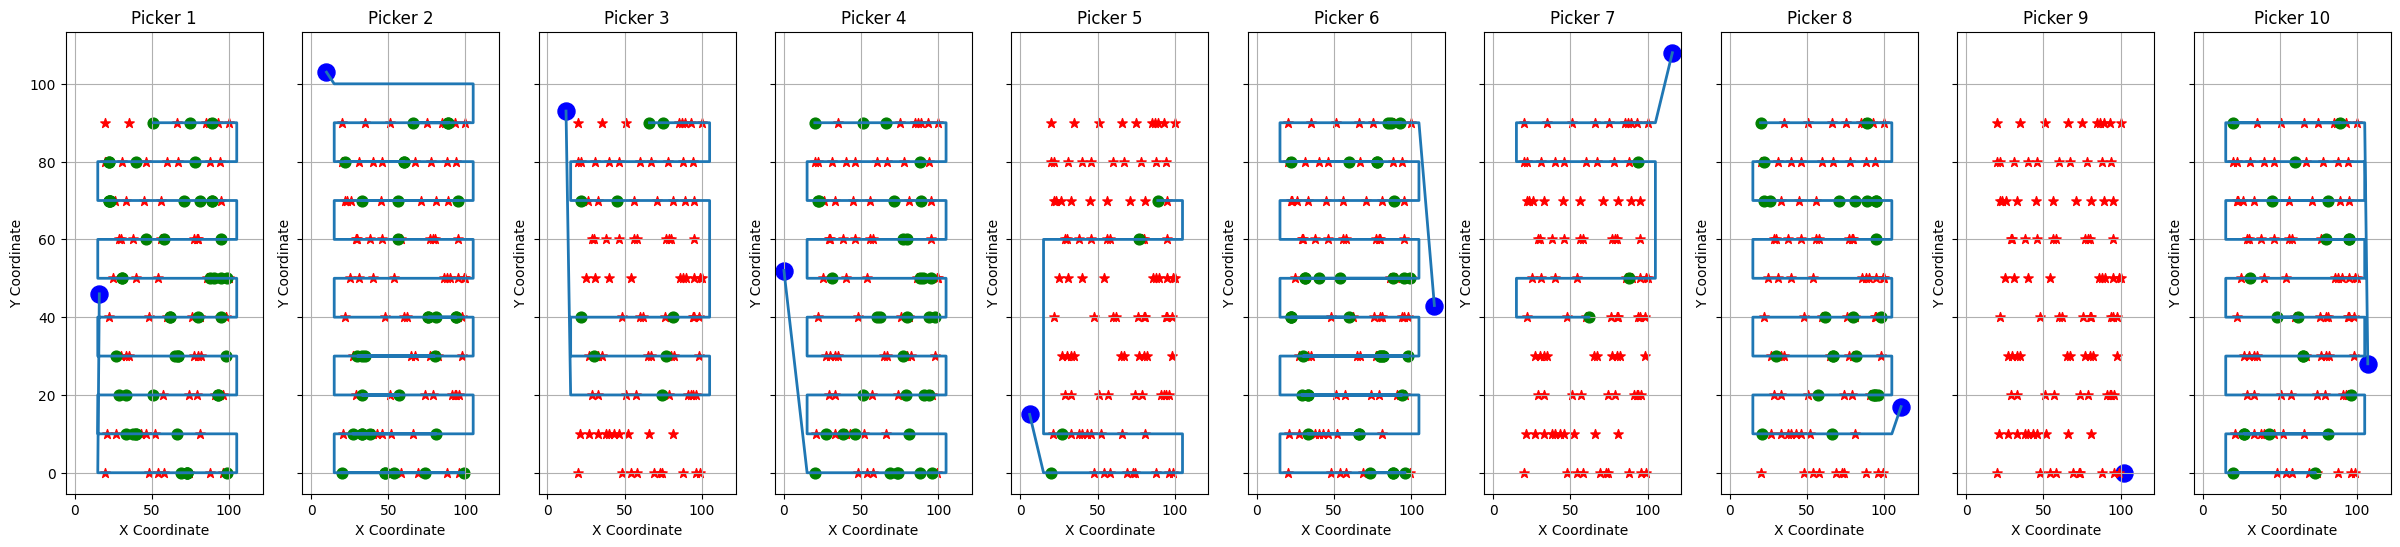

In [ ]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

rows = 100
cols = 100
num_items = 100
num_pickers = 10
MaxIt = 50
nPop = 50 #number of population
pc = 0.90;  #probability of crossover
pm = 0.04 ; #probability of mutation
nc = 2*round((nPop*pc)/2);  #No. of crossover
nm = round(nPop*pm)
beta=0.1
TournmentSize = 5

alpha = 1.0         # Influence of pheromone trails
beta = 2.0          # Influence of heuristic information
rho = 0.5           # Evaporation rate
Q = 100             # Constant used to update the pheromone
num_ants = 25

start_row = 0
step_between_rows = 10
number_of_lines = 10
selected_rows = [start_row + i * step_between_rows for i in range(number_of_lines)]

#random.seed(42)
# picker_locations = [(6, 118), (6, 47), (14, 95), (12, 22), (3, 23), (114, 76), (119, 77), (106, 31), (113, 0), (101, 43)]
# item_locations=[(89, 0), (59, 0), (85, 0), (79, 0), (30, 0), (33, 0), (88, 0), (58, 0), (51, 0), (48, 0), (54, 10), (56, 10), (54, 10), (45, 10), (21, 10), (82, 10), (71, 10), (92, 10), (74, 10), (61, 10), (55, 20), (69, 20), (87, 20), (71, 20), (43, 20), (33, 20), (56, 20), (70, 20), (91, 20), (33, 20), (79, 30), (40, 30), (40, 30), (74, 30), (21, 30), (66, 30), (23, 30), (63, 30), (23, 30), (29, 30), (80, 40), (67, 40), (77, 40), (50, 40), (57, 40), (54, 40), (90, 40), (85, 40), (32, 40), (70, 40), (75, 50), (62, 50), (65, 50), (59, 50), (65, 50), (100, 50), (51, 50), (43, 50), (67, 50), (39, 50), (95, 60), (98, 60), (85, 60), (94, 60), (78, 60), (33, 60), (77, 60), (77, 60), (91, 60), (28, 60), (43, 70), (31, 70), (46, 70), (94, 70), (82, 70), (31, 70), (79, 70), (61, 70), (96, 70), (70, 70), (35, 80), (63, 80), (56, 80), (22, 80), (79, 80), (24, 80), (97, 80), (57, 80), (99, 80), (91, 80), (69, 90), (23, 90), (96, 90), (20, 90), (57, 90), (100, 90), (96, 90), (65, 90), (57, 90), (31, 90)]
picker_capacities = [14, 10, 3, 9, 1, 13, 1, 7, 0, 11]

picker_locations = []
for i in range(num_pickers//2):
    picker_locations.append((random.randint(0,20),random.randint(0,120)))
for i in range(num_pickers//2):
    picker_locations.append((random.randint(100,120),random.randint(0,120)))
# item_locations = [(65, 41), (42, 66), (74, 18), (44, 54), (31, 92), (89, 11), (64, 62), (41, 38), (24, 13), (32, 59), (49, 69), (34, 38), (67, 31), (41, 82), (83, 1), (79, 90), (30, 10), (33, 100), (96, 12), (58, 71), (41, 86), (21, 29), (42, 86), (60, 14), (89, 38), (97, 63), (73, 37), (96, 14), (90, 34), (99, 15), (34, 39), (38, 70), (37, 50), (61, 45), (49, 18), (95, 1), (40, 10), (79, 97), (85, 42), (70, 39), (56, 46), (82, 18), (41, 39), (53, 33), (63, 53), (20, 23), (29, 74), (44, 52), (81, 84), (49, 53), (70, 23), (22, 26), (99, 63), (64, 80), (31, 40), (47, 78), (66, 7), (74, 33), (53, 96), (87, 72), (37, 50), (51, 67), (79, 77), (41, 96), (89, 39), (34, 76), (81, 7), (38, 26), (30, 43), (27, 9), (66, 87), (41, 2), (62, 50), (95, 70), (25, 24), (93, 1), (22, 88), (43, 61), (36, 24), (58, 43), (38, 40), (62, 83), (72, 60), (100, 48), (31, 73), (79, 21), (43, 81), (22, 28), (37, 36), (65, 69), (52, 51), (91, 26), (96, 64), (52, 50), (45, 47), (47, 48), (30, 46), (55, 32), (100, 47), (55, 67)]

item_locations = []
for row in selected_rows:
    for i in range(10):
        # Append random column positions (column_start to column_end) for the given row
        item_locations.append((random.randint(20, 100), row))

num_orders = 100

orders = []

for i in range(0, num_orders):

    num_items_in_order = random.randint(1, 5)

    selected_items = random.choices(item_locations, k=num_items_in_order)

    orders.append(selected_items)
orders_assign=orders[:sum(picker_capacities)]
for order, items in enumerate(orders_assign):
    print(f"{order}: {items}")

print("Pending items")
for order, items in enumerate(orders[sum(picker_capacities)::]):
    print(f"{sum(picker_capacities)+order}: {items}")

print(picker_locations)
picker_locations1 = picker_locations.copy()


print(item_locations)


def e_d(picker_location,item_location):
        x1, y1 = picker_location
        x2, y2 = item_location
        distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        return distance

def walkway_from_condition(value, left_walkway, right_walkway):
      return left_walkway if value % 20 == 0 else right_walkway
#Tournament
def tournament_selection(population, TournmentSize):

    tournament_contestants = random.sample(population, TournmentSize)
    winner = sorted(tournament_contestants, key=lambda x: x[1])[0]
    return winner[0]

#fitness with sorted paths
def calc_distance_with_shortest_route(picker_locations, item_locations, emptypop_position):

      left_walkway=15
      right_walkway=105

      assignments = [[] for _ in range(len(orders_assign))]
      for index, picker_index in enumerate(emptypop_position):
          assignments[picker_index].extend(orders_assign[index])

      sorted_data = [[] for _ in range(num_pickers)]

      total_fitness_score=0

      for i in range(len(picker_locations)):
          data=assignments[i]
          quotients = {}
          for item in data:
              quotient = item[1] // 10
              if quotient not in quotients:
                  quotients[quotient] = []
              quotients[quotient].append(item)

          for quotient in sorted(quotients.keys()):
              group = quotients[quotient]
              if quotient % 2 != 0:  # Even
                  sorted_group = sorted(group, key=lambda x: x[0], reverse=True)
              else:  # Odd
                  sorted_group = sorted(group, key=lambda x: x[0])
              sorted_data[i].extend(sorted_group)
      r_flag=[0]*10

      for p in range(len(picker_locations)):
        if not sorted_data[p]:
          continue

        dist1_walkway = walkway_from_condition(sorted_data[p][0][1], left_walkway, right_walkway)
        dist2_walkway = walkway_from_condition(sorted_data[p][-1][1], left_walkway, right_walkway)

        dist1 = e_d(picker_locations[p], (dist1_walkway, sorted_data[p][0][1]))
        dist2 = e_d(picker_locations[p], (dist2_walkway, sorted_data[p][-1][1]))


        if picker_locations[p][0] < 50:
          if dist1<dist2:
            sorted_data[p].insert(0,picker_locations[p])
            if sorted_data[p][1][1]%20 == 0:
              sorted_data[p].insert(1,(left_walkway,sorted_data[p][1][1]))
            else :
              sorted_data[p].insert(1,(left_walkway,sorted_data[p][1][1]-step_between_rows))
          else:
            sorted_data[p]=sorted_data[p][::-1]
            r_flag[p]=1
            sorted_data[p].insert(0,picker_locations[p])
            if sorted_data[p][1][1]%20 ==0:
              sorted_data[p].insert(1,(left_walkway,sorted_data[p][1][1]))
            else:
              sorted_data[p].insert(1,(left_walkway,sorted_data[p][1][1]+step_between_rows))
        else:
          if dist1<dist2:
            if sorted_data[p][0][1]%20 != 0:
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(right_walkway,sorted_data[p][1][1]))
            else:
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(right_walkway,sorted_data[p][1][1]-step_between_rows))
          else:
            r_flag[p]=1
            if sorted_data[p][-1][1]%20 !=0:
              sorted_data[p]=sorted_data[p][::-1]
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(right_walkway,sorted_data[p][1][1]))
            else:
              sorted_data[p]=sorted_data[p][::-1]
              sorted_data[p].insert(0,picker_locations[p])
              sorted_data[p].insert(1,(right_walkway,sorted_data[p][1][1]+step_between_rows))

         # print(r_flag)
      l=[]

      for j,k in enumerate(sorted_data):
        if not k:
              l.append([])
              continue
        l1 = k.copy()

        i = 1
        while i < len(l1) - 1:
            if l1[i][1] != l1[i + 1][1]:
                if l1[i][1] % 20 == 0:
                    if l1[i + 1][1] % 20 != 0:

                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, l1[i + 2][1]))
                        i += 2
                    else:
                      if r_flag[j]==0:
                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, (l1[i + 1][1] + step_between_rows)))
                        l1.insert(i + 3, (left_walkway, (l1[i + 2][1])))
                        l1.insert(i + 4, (left_walkway, l1[i + 4][1]))
                        i += 4
                      else:
                        l1.insert(i + 1, (right_walkway, l1[i][1]))
                        l1.insert(i + 2, (right_walkway, (l1[i + 1][1] - step_between_rows)))
                        l1.insert(i + 3, (left_walkway, (l1[i + 2][1])))
                        l1.insert(i + 4, (left_walkway, l1[i + 4][1]))
                        i += 4
                else:
                    if l1[i + 1][1] % 20 == 0:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, l1[i + 2][1]))
                        i += 2
                    else:
                      if r_flag[j]==0:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, (l1[i + 1][1] + step_between_rows))) #i+1 needed
                        l1.insert(i + 3, (right_walkway, (l1[i + 2][1])))#i+2
                        l1.insert(i + 4, (right_walkway, l1[i + 4][1]))
                        i += 4
                      else:
                        l1.insert(i + 1, (left_walkway, l1[i][1]))
                        l1.insert(i + 2, (left_walkway, (l1[i + 1][1] - step_between_rows)))
                        l1.insert(i + 3, (right_walkway, (l1[i + 2][1])))
                        l1.insert(i + 4, (right_walkway, l1[i + 4][1]))
                        i += 4
            else:
                i += 1
        l.append(l1)

      total_cost = 0
      individual_costs = []
      for points in l:
          list_cost = 0

          for i in range(len(points) - 1):
              x1, y1 = points[i]
              x2, y2 = points[i + 1]
              distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
              list_cost += distance

          individual_costs.append(list_cost)
          total_cost += list_cost

      return total_cost,l,assignments


def crossover(x1, x2):

    q = random.uniform(0, 1)

    if q <= pc:

        g = random.randint(1, 2)

        if g == 1:
            y1, y2 = single_point_crossover(x1, x2)
        elif g == 2:
            y1, y2 = uniform_crossover(x1, x2)

        # Ensure offspring satisfy picker capacity constraints
        y1 = enforce_capacity_constraints(y1, picker_capacities)
        y2 = enforce_capacity_constraints(y2, picker_capacities)

    else:

        y1 = x1[:]
        y2 = x2[:]

    return y1, y2


def single_point_crossover(x1, x2):

    n = len(x1)

    crossover_point = random.randint(1, n - 1)

    y1 = x1[:crossover_point] + x2[crossover_point:]
    y2 = x2[:crossover_point] + x1[crossover_point:]

    return y1, y2


def uniform_crossover(x1, x2):

    n = len(x1)
    y1 = []
    y2 = []

    for i in range(n):
        if random.random() < 0.5:
            y1.append(x1[i])
            y2.append(x2[i])
        else:
            y1.append(x2[i])
            y2.append(x1[i])

    return y1, y2


def enforce_capacity_constraints(offspring, picker_capacities):

    # Count how many items are currently assigned to each picker
    assigned_counts = [0] * num_pickers
    for picker_id in offspring:
        assigned_counts[picker_id] += 1

    # Identify pickers that are over their capacity
    over_capacity = {picker_id: count - picker_capacities[picker_id]
                     for picker_id, count in enumerate(assigned_counts) if count > picker_capacities[picker_id]}

    # Reassign items from over-capacity pickers
    for i, picker_id in enumerate(offspring):
        if picker_id in over_capacity and over_capacity[picker_id] > 0:
            # Find a valid picker with available capacity
            valid_pickers = [p for p in range(num_pickers) if assigned_counts[p] < picker_capacities[p]]

            if valid_pickers:
                # Reassign the item to a valid picker
                new_picker = random.choice(valid_pickers)
                offspring[i] = new_picker

                # Update counts
                assigned_counts[picker_id] -= 1
                assigned_counts[new_picker] += 1
                over_capacity[picker_id] -= 1

    return offspring

def mutate_with_capacity(x, picker_capacities):
    y = x[:]
    attempts = 10

    while attempts > 0:  # Try mutating while respecting capacity
        j = np.random.randint(len(x))
        assigned_picker = y[j]
        new_picker = np.random.randint(num_pickers)

        y[j] = new_picker

        # Check capacity constraint
        assigned_counts = [y.count(picker_id) for picker_id in range(num_pickers)]
        if all(assigned_counts[picker_id] <= picker_capacities[picker_id] for picker_id in range(num_pickers)):
            return y  # Valid mutation found

        # Revert and try again
        y[j] = assigned_picker
        attempts -= 1

    return x

def main():
    empty_pop = []
    global orders
    # Initial Population
    for iteration in range(25-1):
        emptypop_position = []

        assigned_counts = [0] * num_pickers

        for f in range(len(orders_assign)):
            valid_pickers = [i for i in range(num_pickers) if assigned_counts[i] < picker_capacities[i]]

            picker_id = random.choice(valid_pickers)
            assigned_counts[picker_id] += 1
            emptypop_position.append(picker_id)

        random.shuffle(emptypop_position)

        fitness_score, sorted_paths,_ = calc_distance_with_shortest_route(picker_locations, item_locations, emptypop_position)
        empty_pop.append([emptypop_position, fitness_score])  # Append individuals with their fitness

    pheromone = np.ones((num_items, num_pickers))  # Initialize pheromone trails

    heuristic = np.zeros((num_items, num_pickers))  # Calculate heuristic values
    for item_idx, item_loc in enumerate(item_locations):
        for picker_idx, picker_loc in enumerate(picker_locations):
            distance = math.sqrt((item_loc[0] - picker_loc[0])**2 + (item_loc[1] - picker_loc[1])**2)
            heuristic[item_idx][picker_idx] = 1 / (distance + 1e-6)

    for ant in range(num_ants):
            assignment = [-1] * num_items  # Assignment of pickers to items
            picker_loads = [0] * num_pickers  # Track picker loads (capacity used)

            for item in range(num_items):
                valid_pickers = []
                prob = []

                # Identify pickers who can take the item without exceeding capacity
                for picker in range(num_pickers):
                    if picker_loads[picker] < picker_capacities[picker]:
                        valid_pickers.append(picker)
                        prob.append((pheromone[item][picker] ** alpha) * (heuristic[item][picker] ** beta))

                if valid_pickers:
                    prob = np.array(prob)
                    prob /= prob.sum()  # Normalize probabilities
                    chosen_picker = np.random.choice(valid_pickers, p=prob)  # Select picker based on probabilities
                    assignment[item] = chosen_picker
                    picker_loads[chosen_picker] += 1
                else:
                    # If no picker can take the item, leave it unassigned (optional: handle unassigned items later)
                    assignment[item] = -1  # '-1' indicates the item was not assigned

            # Evaluate the solution
            fitness_score, sorted_paths,_ = calc_distance_with_shortest_route(picker_locations, item_locations, emptypop_position)
            empty_pop.append([emptypop_position, fitness_score])
    print("hi",(len(orders_assign)))
    for item in range(len(orders_assign)):

            if assignment[item] != -1:
                pheromone[item][assignment[item]] *= (1 - rho)
                pheromone[item][assignment[item]] += 1 / fitness_score

    pop = sorted(empty_pop, key=lambda x: x[1])  # Sort population by fitness
    best_solution = pop[0]

    # Genetic Algorithm Loop
    for iteration in range(MaxIt):
        crossover_population = []

        # Crossover
        for c in range(nc // 2):
            parent1 = tournament_selection(pop, TournmentSize)
            parent2 = tournament_selection(pop, TournmentSize)
            offspring1_position, offspring2_position = crossover(parent1, parent2)

            offspring1_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring1_position)
            offspring2_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring2_position)

            crossover_population.append([offspring1_position, offspring1_fitness])
            crossover_population.append([offspring2_position, offspring2_fitness])

        empty_pop.extend(crossover_population)

        # Mutation
        mutation_population = []
        for c in range(nm):
            parent = random.choice(pop)[0]
            offspring_position = mutate_with_capacity(parent, picker_capacities)

            offspring_fitness, _,_ = calc_distance_with_shortest_route(picker_locations, item_locations, offspring_position)

            mutation_population.append([offspring_position, offspring_fitness])

        empty_pop.extend(mutation_population)

        # Select the next generation
        empty_pop = sorted(empty_pop, key=lambda x: x[1])
        pop = empty_pop[:nPop]  # Only take the top `nPop` individuals
        new_best_solution = pop[0]

        print(f"Iteration:{iteration} Best Solution:", new_best_solution[0],new_best_solution[1])

    final_solution = new_best_solution[0]

    # Final output
    print(f"\nFinal Best Solution (Pick Assignments): {final_solution}")

    # Generate orders for each picker based on the final solution
    orders = {picker_id: [] for picker_id in range(num_pickers)}
    for item_id, picker_id in enumerate(final_solution):
        orders[picker_id].append(item_id)

    print("\nOrders for Each Picker:")
    for picker_id, items in orders.items():
        print(f"Picker {picker_id}: Orders {items}")

    # Generate **sorted paths** for plotting
    _,sorted_paths,assignments = calc_distance_with_shortest_route(picker_locations, item_locations, final_solution)

    # Plot results with sorted paths
    fig, axes = plt.subplots(nrows=1, ncols=len(picker_locations1), figsize=(30, 6), sharex=True, sharey=True)

    picker_x, picker_y = zip(*picker_locations1)  # Original picker locations
    item_x, item_y = zip(*item_locations)  # All item locations

    for group, ax in enumerate(axes):
        if group >= len(picker_locations1):  # Prevent index errors
            continue

        ax.scatter(*picker_locations1[group], c='blue', s=150, label='Picker Start', marker='o')  # Start picker locations

        ax.scatter(item_x, item_y, c='red', s=50, label='Items', marker='*')

        if group < len(sorted_paths):
            points = [picker_locations1[group]] + sorted_paths[group]

            if len(points) > 1:
                x, y = zip(*points)
                ax.plot(x, y, label=f'Picker {group + 1} Path', linestyle='-', linewidth=2)

        if group < len(assignments):
            assignment_points = assignments[group]
        if assignment_points:
            assign_x, assign_y = zip(*assignment_points)
            ax.scatter(assign_x, assign_y, c='green', s=60, label='Assigned Items', marker='o')

        ax.set_title(f"Picker {group + 1}", fontsize=12)
        ax.set_xlabel("X Coordinate", fontsize=10)
        ax.set_ylabel("Y Coordinate", fontsize=10)
        ax.grid(True)

main()